<a href="https://colab.research.google.com/github/Bast1-py/Experience-Developing-Projects/blob/main/Predictive_Modeling_of_Vehicle_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* exploratory data analysis (EDA) and preprocessing: identify missing value, identify inconsistent value, Feature Engineering, Visualization (trend and pattern), distribution of features.
* Feature Selection analysing using ANOVA tests.
* Model selection using regression and XGB model
* Model Training and Model Evaluation
* improve model with Fine Tuning Hyperparameters

# **Exploratory Data Analysis (EDA) and Visualization**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from matplotlib.patches import Patch

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
# plt.style.use('fivethirtyeight')


# Built Model Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
import xgboost as xgb


In [ ]:
df = pd.read_csv('/content/autos.csv', encoding='utf-8')
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_T V_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,2016-03-27 00:00:00,0,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___T V_neu+...,privat,Angebot,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,2016-03-28 00:00:00,0,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,2016-04-02 00:00:00,0,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,2016-03-08 00:00:00,0,35683,2016-04-05 16:45:07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

In [ ]:
df.describe()

,yearOfRegistration,powerPS,monthOfRegistration,nrOfPictures,postalCode
count,50000.000000,50000.000000,50000.000000,50000.0,50000.000000
mean,2005.073280,116.355920,5.723360,0.0,50813.627300
std,105.712813,209.216627,3.711984,0.0,25779.747957
min,1000.000000,0.000000,0.000000,0.0,1067.000000
25%,1999.000000,70.000000,3.000000,0.0,30451.000000
50%,2003.000000,105.000000,6.000000,0.0,49577.000000
75%,2008.000000,150.000000,9.000000,0.0,71540.000000
max,9999.000000,17700.000000,12.000000,0.0,99998.000000


In [ ]:
df['dateCrawled'] = pd.to_datetime(df['dateCrawled'])
df['lastSeen'] = pd.to_datetime(df['lastSeen'])
df['dateCreated'] = pd.to_datetime(df['dateCreated'])
df.dtypes

,0
dateCrawled,datetime64[ns]
name,object
seller,object
offerType,object
price,object
abtest,object
vehicleType,object
yearOfRegistration,int64
gearbox,object
powerPS,int64


In [ ]:
df.isnull().sum()

,0
dateCrawled,0
name,0
seller,0
offerType,0
price,0
abtest,0
vehicleType,5095
yearOfRegistration,0
gearbox,2680
powerPS,0


## Menghitung banyaknya fitur yang nilai kosong

In [ ]:
persentase_missvalues = df.isnull().sum().sort_values(ascending=False)*100/len(df)
persentase_missvalues

,0
notRepairedDamage,19.658
vehicleType,10.190
fuelType,8.964
model,5.516
gearbox,5.360
odometer,0.000
postalCode,0.000
nrOfPictures,0.000
dateCreated,0.000
brand,0.000


                                   index  percent
notRepairedDamage      notRepairedDamage   19.658
vehicleType                  vehicleType   10.190
fuelType                        fuelType    8.964
model                              model    5.516
gearbox                          gearbox    5.360
odometer                        odometer    0.000
postalCode                    postalCode    0.000
nrOfPictures                nrOfPictures    0.000
dateCreated                  dateCreated    0.000
brand                              brand    0.000
monthOfRegistration  monthOfRegistration    0.000
dateCrawled                  dateCrawled    0.000
name                                name    0.000
powerPS                          powerPS    0.000
yearOfRegistration    yearOfRegistration    0.000
abtest                            abtest    0.000
price                              price    0.000
offerType                      offerType    0.000
seller                            seller    0.000


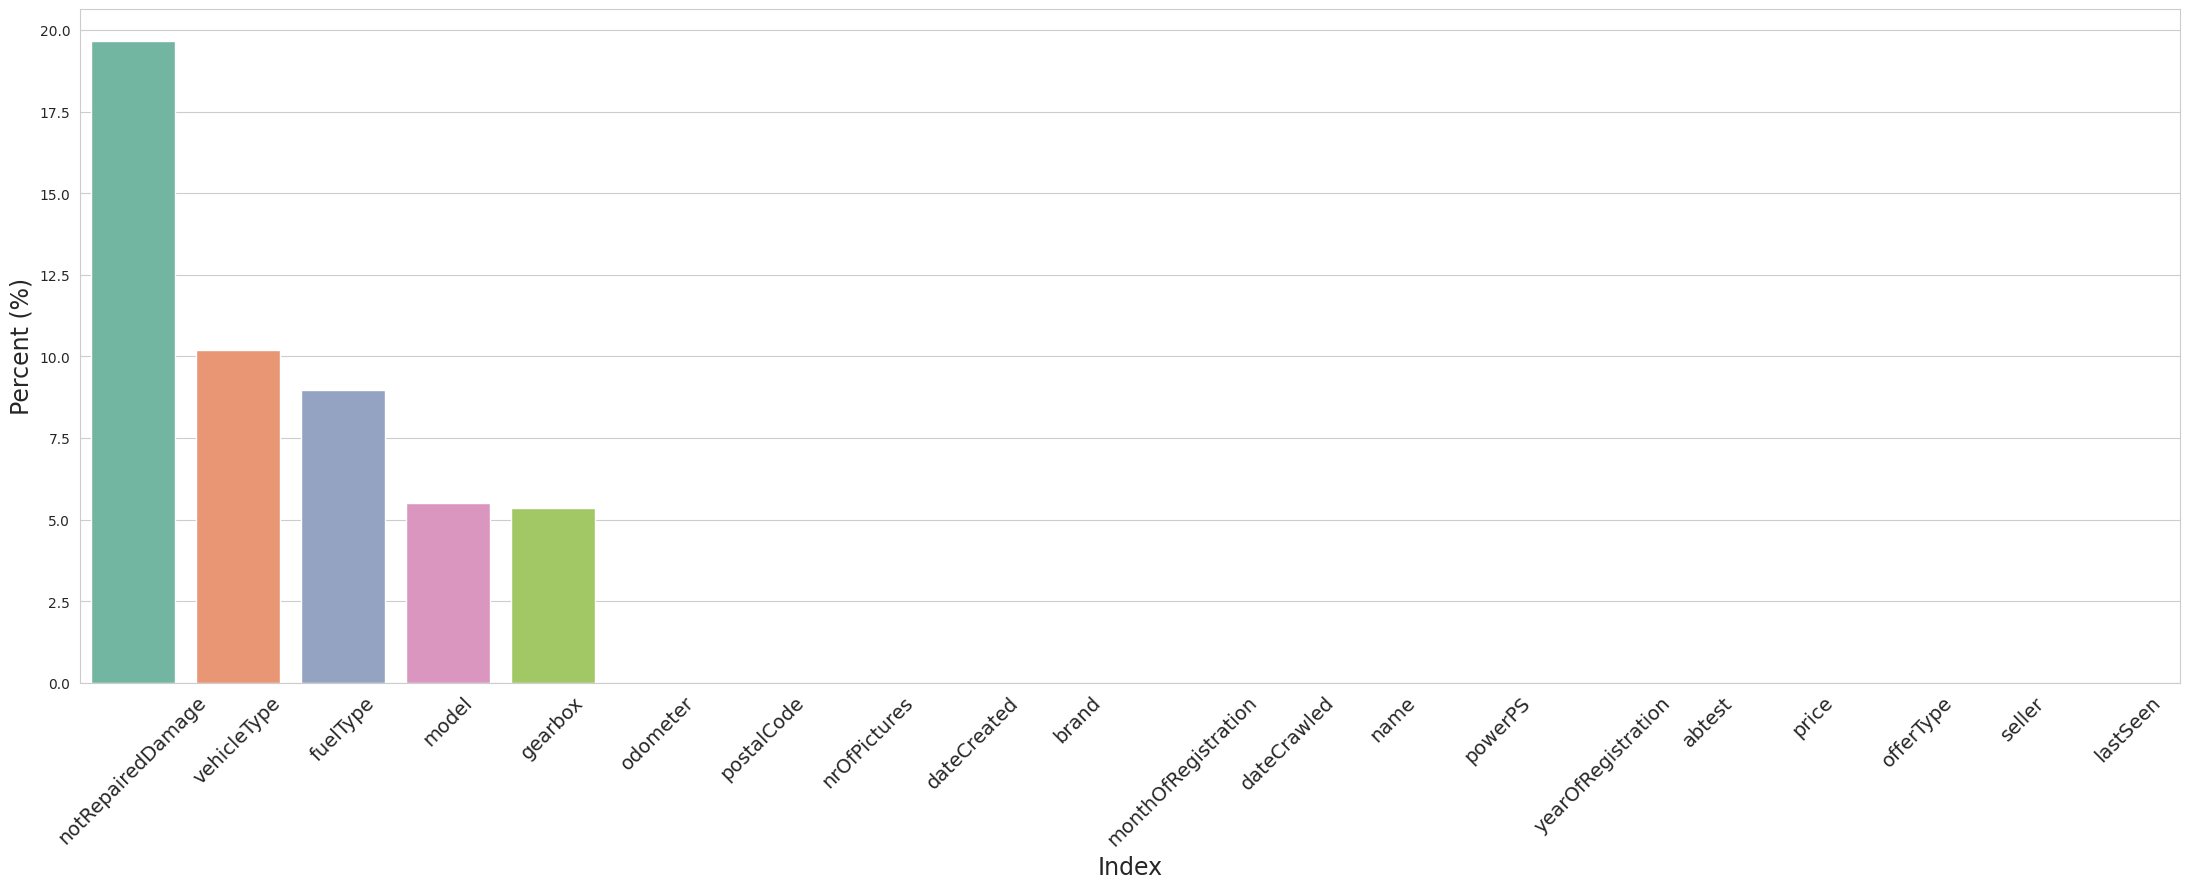

In [ ]:
miss_values = pd.DataFrame({'index':persentase_missvalues.index, 'percent':persentase_missvalues})
print(miss_values)

plt.figure(figsize=(22,9))
sns.barplot(x=miss_values['index'],
            y=miss_values['percent'],
            data=miss_values,
            palette='Set2')
plt.xticks(size=14,
           rotation=45)
plt.xlabel('Index', fontdict={'size':17})
plt.ylabel('Percent (%)', fontdict={'size':17})
plt.xticks(size=14)
plt.tight_layout()
plt.show()

In [ ]:
# mengisi nilai hilang

miss_col = ['notRepairedDamage','vehicleType','fuelType','model','gearbox']
for i in miss_col:
  df[i].fillna(df[i].mode()[0], axis=0, inplace=True)

In [ ]:
df['brand'].unique()

array(['peugeot', 'bmw', 'volkswagen', 'smart', 'ford', 'chrysler',
       'seat', 'renault', 'mercedes_benz', 'audi', 'sonstige_autos',
       'opel', 'mazda', 'porsche', 'mini', 'toyota', 'dacia', 'nissan',
       'jeep', 'saab', 'volvo', 'mitsubishi', 'jaguar', 'fiat', 'skoda',
       'subaru', 'kia', 'citroen', 'chevrolet', 'hyundai', 'honda',
       'daewoo', 'suzuki', 'trabant', 'land_rover', 'alfa_romeo', 'lada',
       'rover', 'daihatsu', 'lancia'], dtype=object)

In [ ]:
df['model'].unique()

array(['andere', '7er', 'golf', 'fortwo', 'focus', 'voyager', 'arosa',
       'megane', 'a3', 'clio', 'vectra', 'scirocco', '3er', 'a4', '911',
       'cooper', '5er', 'polo', 'e_klasse', '2_reihe', 'c_klasse',
       'corsa', 'mondeo', 'altea', 'a1', 'twingo', 'a_klasse', 'cl',
       '3_reihe', 's_klasse', 'sandero', 'passat', 'primera', 'fiesta',
       'wrangler', 'clubman', 'a6', 'transporter', 'astra', 'v40',
       'ibiza', 'micra', '1er', 'yaris', 'colt', '6_reihe', '5_reihe',
       'corolla', 'ka', 'tigra', 'punto', 'vito', 'cordoba', 'galaxy',
       '100', 'sharan', 'octavia', 'm_klasse', 'lupo', 'superb', 'meriva',
       'c_max', 'laguna', 'touran', '1_reihe', 'm_reihe', 'touareg',
       'seicento', 'avensis', 'vivaro', 'x_reihe', 'ducato', 'carnival',
       'boxster', 'signum', 'zafira', 'rav', 'a5', 'beetle', 'c_reihe',
       'phaeton', 'i_reihe', 'sl', 'insignia', 'up', 'civic', '80',
       'mx_reihe', 'omega', 'sorento', 'z_reihe', 'berlingo', 'clk',
       's_max

In [ ]:
df['price'].unique()

array(['$5,000', '$8,500', '$8,990', ..., '$385', '$22,200', '$16,995'],
      dtype=object)

In [ ]:
df['name'].unique()

array(['Peugeot_807_160_NAVTECH_ON_BOARD',
       'BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik',
       'Volkswagen_Golf_1.6_United', ...,
       'Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon',
       'Opel_Astra_F_Cabrio_Bertone_Edition___T V_neu+Reifen_neu_!!',
       'Fiat_500_C_1.2_Dualogic_Lounge'], dtype=object)

In [ ]:
df['yearOfRegistration'].unique()

array([2004, 1997, 2009, 2007, 2003, 2006, 1995, 1998, 2000, 2017, 2010,
       1999, 1982, 1990, 2015, 2014, 1996, 1992, 2005, 2002, 2012, 2011,
       2008, 1985, 2016, 1994, 1986, 2001, 2018, 2013, 1972, 1993, 1988,
       1989, 1967, 1973, 1956, 1976, 4500, 1987, 1991, 1983, 1960, 1969,
       1950, 1978, 1980, 1984, 1963, 1977, 1961, 1968, 1934, 1965, 1971,
       1966, 1979, 1981, 1970, 1974, 1910, 1975, 5000, 4100, 2019, 1959,
       9996, 9999, 6200, 1964, 1958, 1800, 1948, 1931, 1943, 9000, 1941,
       1962, 1927, 1937, 1929, 1000, 1957, 1952, 1111, 1955, 1939, 8888,
       1954, 1938, 2800, 5911, 1500, 1953, 1951, 4800, 1001])

## Distribusi dari Vehicles oleh fitur yearOfRegistration

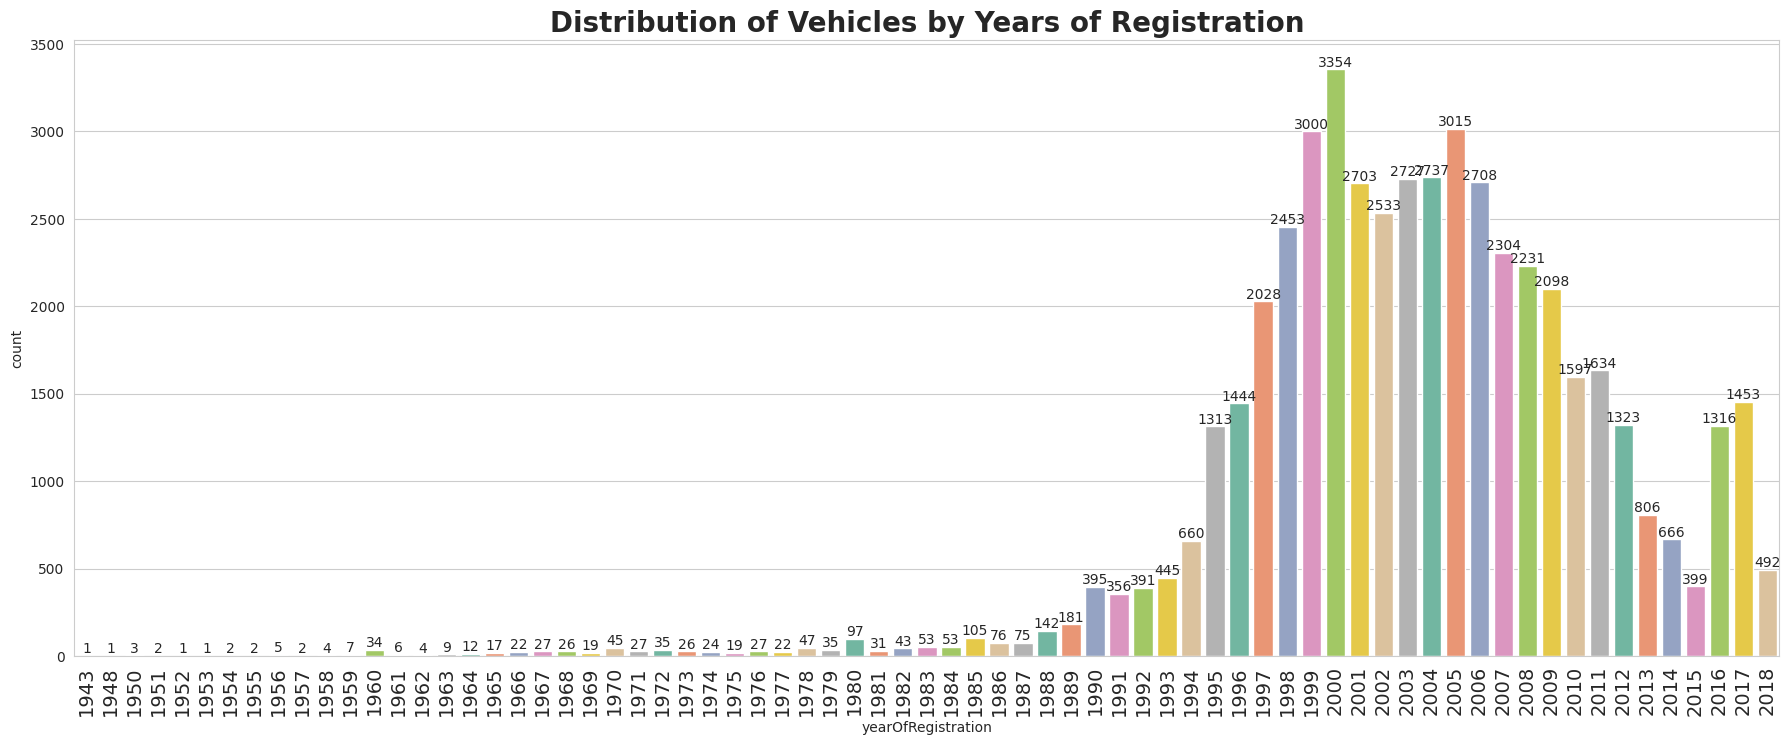

In [ ]:
plt.figure(figsize=(22,8))
df_tahun = df[(df['yearOfRegistration']>=1943) & (df['yearOfRegistration']<=2018)]
ax = sns.countplot(data=df,
                   x=df_tahun['yearOfRegistration'],
                   palette=sns.color_palette("Set2", 76))
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(size=14,
           rotation=90)
plt.title('Distribution of Vehicles by Years of Registration',
          fontsize=20,
          fontweight='bold')
plt.show()

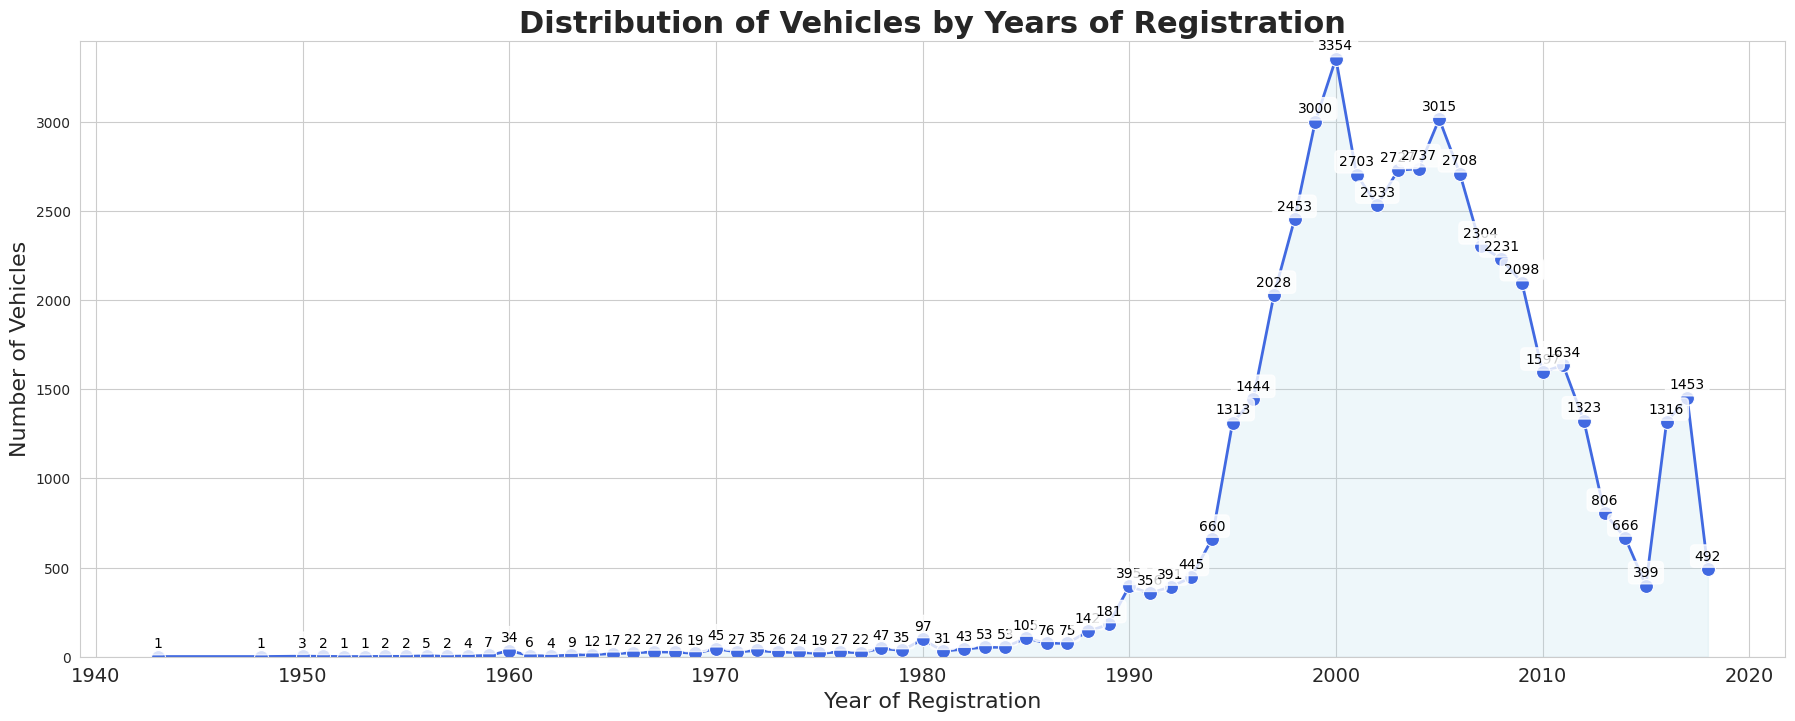

In [ ]:
plt.figure(figsize=(22, 8))
df_tahun = df[(df['yearOfRegistration'] >= 1943) & (df['yearOfRegistration'] <= 2018)]
data_count = df_tahun['yearOfRegistration'].value_counts().sort_index().reset_index()
data_count.columns = ['yearOfRegistration', 'count']

ax = sns.lineplot(data=data_count,
                  x='yearOfRegistration',
                  y='count',
                  marker='o',
                  color='royalblue',
                  linewidth=2,
                  markersize=10)

plt.fill_between(data_count['yearOfRegistration'],
                 data_count['count'],
                 alpha=0.2,
                 color='lightblue') # Menambahkan area di bawah garis dengan warna yang lebih transparan
for x, y in zip(data_count['yearOfRegistration'], data_count['count']):
    ax.text(x, y + 50, str(y),
            color='black',
            ha='center',
            fontsize=10,
            bbox=dict(facecolor='white',
                      alpha=0.8,
                      boxstyle='round, pad=0.3'))
plt.grid(True, linestyle='-', alpha=1)
plt.ylim(0, data_count['count'].max() + 100)
plt.xticks(size=14, rotation=0)
plt.title('Distribution of Vehicles by Years of Registration',
          fontsize=22,
          fontweight='bold')
plt.xlabel('Year of Registration', fontsize=16)
plt.ylabel('Number of Vehicles', fontsize=16)
plt.show()

## Tipe Bahan Bakar

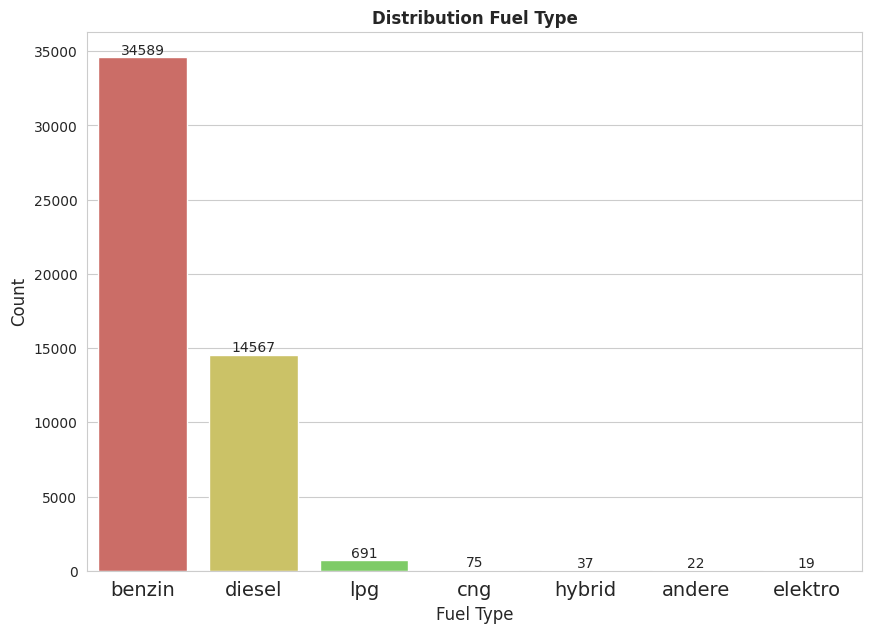

In [ ]:
plt.figure(figsize=(10,7))
df['fuelType'].value_counts()
ax = sns.countplot(data=df,
                   x=df['fuelType'],
                   order=df['fuelType'].value_counts().index,
                   palette='hls')
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Fuel Type', fontdict={'size':12})
plt.ylabel('Count', fontdict={'size':12})
plt.title('Distribution Fuel Type',
          fontweight='bold')
plt.xticks(size=14)
plt.show()

##  Distribusi dari power and tipe bahan bakar

In [ ]:
fuel_power = df[['fuelType','powerPS']]
fuel_power_mean = df.groupby('fuelType')['powerPS'].mean().sort_values(ascending=False)
fuel_power_mean

,powerPS
fuelType,
lpg,144.671491
diesel,133.753072
hybrid,128.783784
benzin,108.573477
cng,92.320000
elektro,73.000000
andere,41.954545


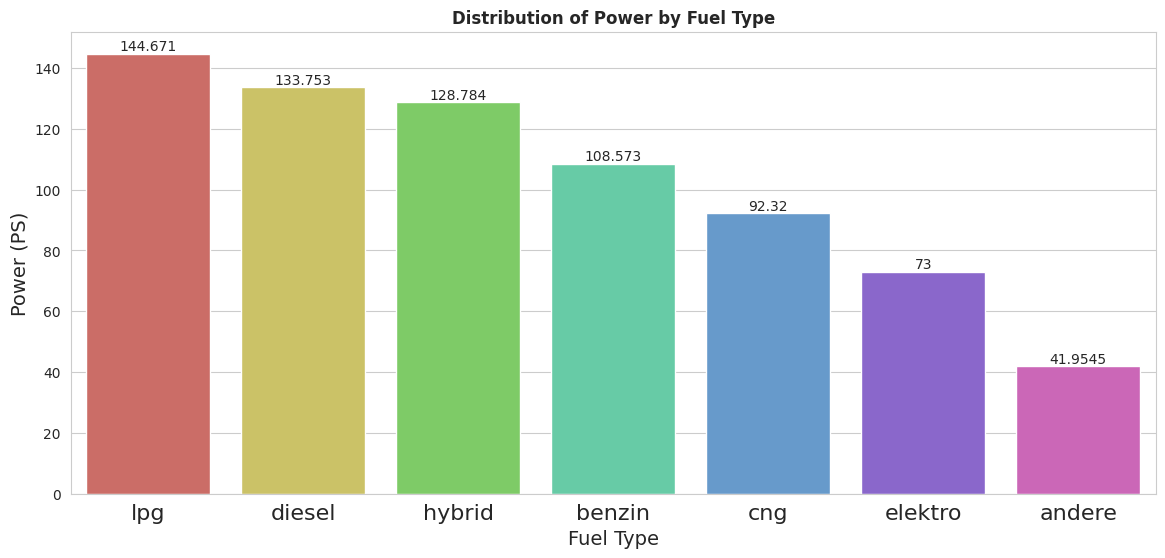

In [ ]:
plt.figure(figsize=(14,6))
fuel_power_mean = pd.DataFrame({'index':fuel_power_mean.index,
                               'power':fuel_power_mean})
ax = sns.barplot(x='index',
                y='power',
                data=fuel_power_mean,
                palette='hls')

for i in ax.containers:
    ax.bar_label(i)

plt.xlabel('Fuel Type', fontdict={'size': 14})
plt.ylabel('Power (PS)', fontdict={'size': 14})
plt.xticks(size=16)
plt.title('Distribution of Power by Fuel Type',
          fontweight='bold')
plt.show()

In [ ]:
df.odometer

,odometer
0,"150,000km"
1,"150,000km"
2,"70,000km"
3,"70,000km"
4,"150,000km"
...,...
49995,"100,000km"
49996,"150,000km"
49997,"5,000km"
49998,"40,000km"


In [ ]:
df.price

,price
0,"$5,000"
1,"$8,500"
2,"$8,990"
3,"$4,350"
4,"$1,350"
...,...
49995,"$24,900"
49996,"$1,980"
49997,"$13,200"
49998,"$22,900"


# **Feature Engineering**

In [ ]:
# Fitur price
df['price'] = (df['price'].str.replace('$','').str.replace(',','').astype(int))

# Fitur odomater ke kilometer
df['odometer'] = (df['odometer'].str.replace('km','').str.replace(',','').astype(int))
df.rename({'odometer': 'odometer_km'}, axis=1, inplace=True)


In [ ]:
df.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer_km,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_T V_neu_ist_sehr_gepfleg...,privat,Angebot,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01,0,39218,2016-04-01 14:38:50


## Mean Price, Power, and Adometer dari Brand

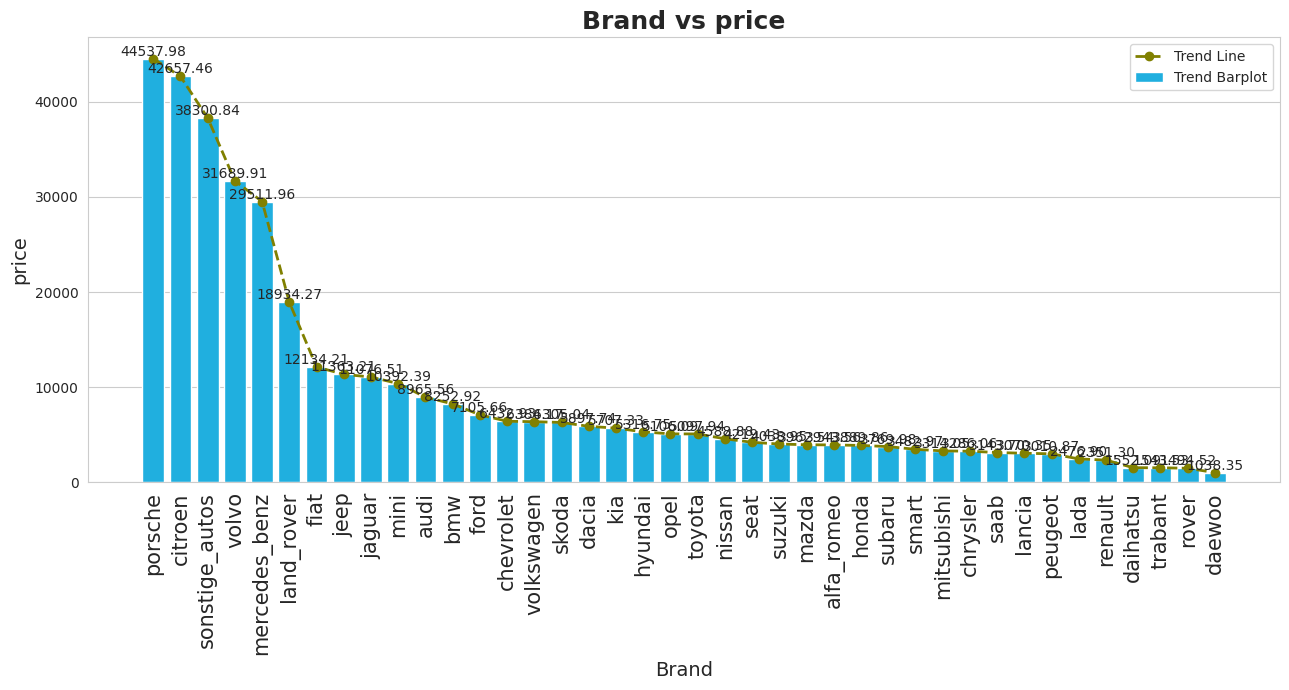

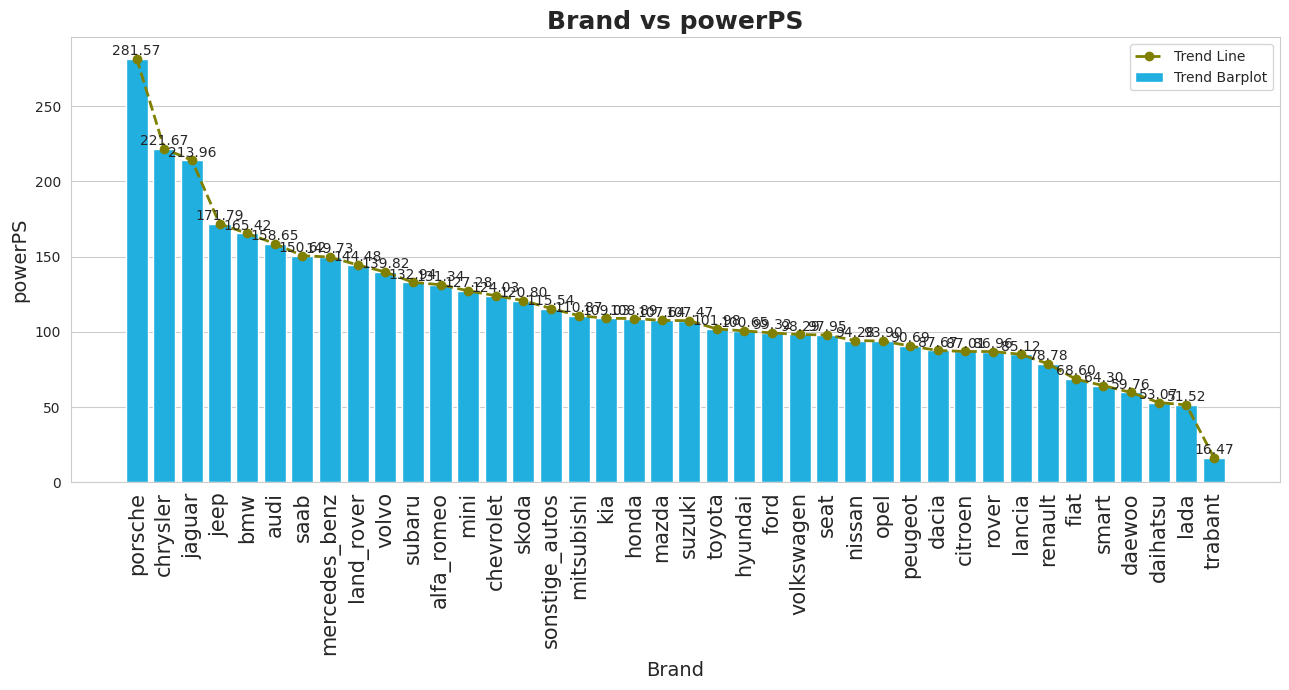

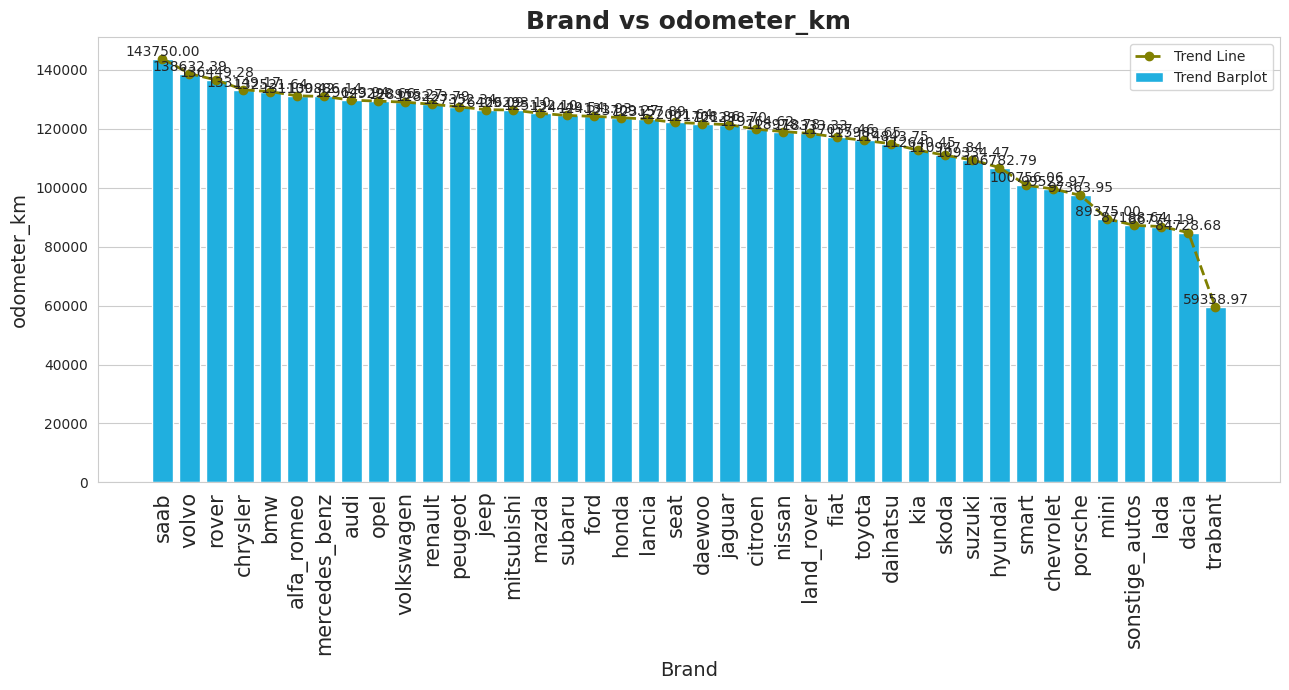

In [ ]:
brand_col = ['price','powerPS','odometer_km']

for i in brand_col:
  plt.figure(figsize=(13,7))
  brand_col_mean = df.groupby('brand')[i].mean().sort_values(ascending=False)
  fuel_power_mean = pd.DataFrame({'index':brand_col_mean.index, 'power':brand_col_mean})

  sns.barplot(x='index',
              y='power',
              data=fuel_power_mean,
              color='deepskyblue',
              label='Trend Barplot')

  for index, value in enumerate(fuel_power_mean['power']):
    plt.text(index, value + 0.5,
             f'{value:.2f}',
             ha='center',
             va='bottom', fontsize=10)

  plt.plot(fuel_power_mean['index'],
           fuel_power_mean['power'],
           marker='o',
           linestyle='--',
           color='olive',
           linewidth=2,
           label='Trend Line')

  plt.xticks(size=15,
             rotation=90)
  plt.xlabel('Brand', fontsize=14)
  plt.ylabel(i, fontsize=14)
  plt.title(f'Brand vs {i}',
            fontsize=18,
            fontweight='bold')
  plt.legend()

  plt.grid(axis='y',
           linestyle='-',
           alpha=1)
  plt.tight_layout()
  plt.show()

## Top Listed Brand

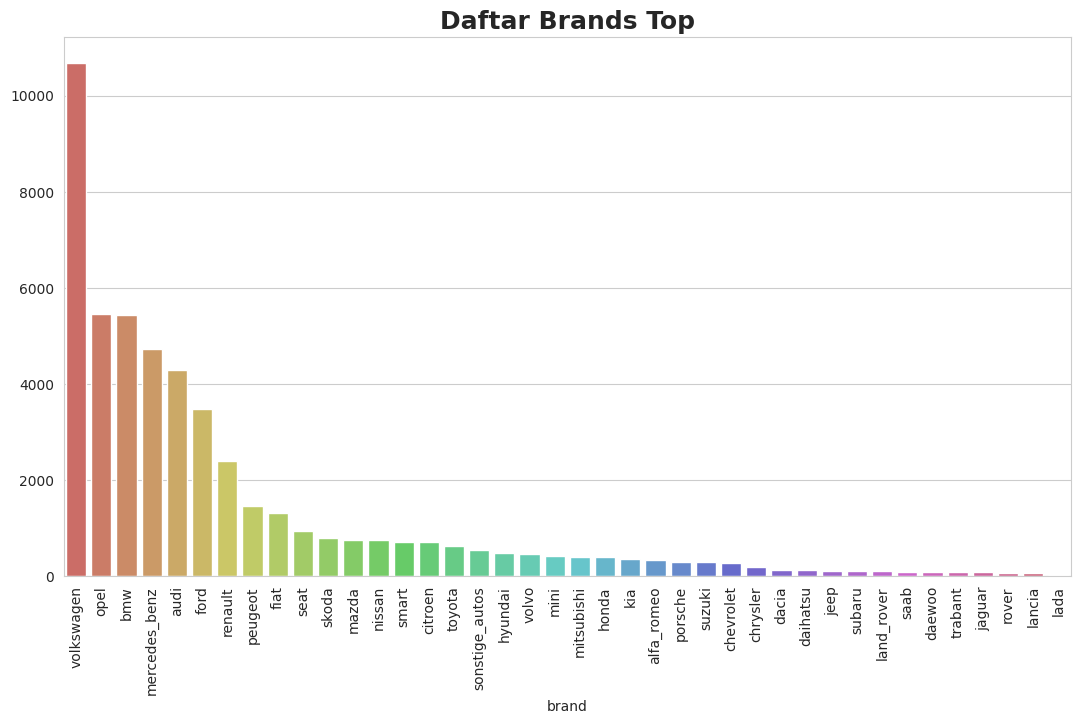

In [ ]:
plt.figure(figsize=(13,7))
top_sell = df['brand'].value_counts(ascending=False)
sns.barplot(x=top_sell.index,
            y=top_sell.values,
            palette='hls')
plt.xticks(rotation=90,
           fontsize=10)
plt.title('Daftar Brands Top',
          fontsize=18,
          fontweight='bold')
plt.show()

## Top 5 Brands

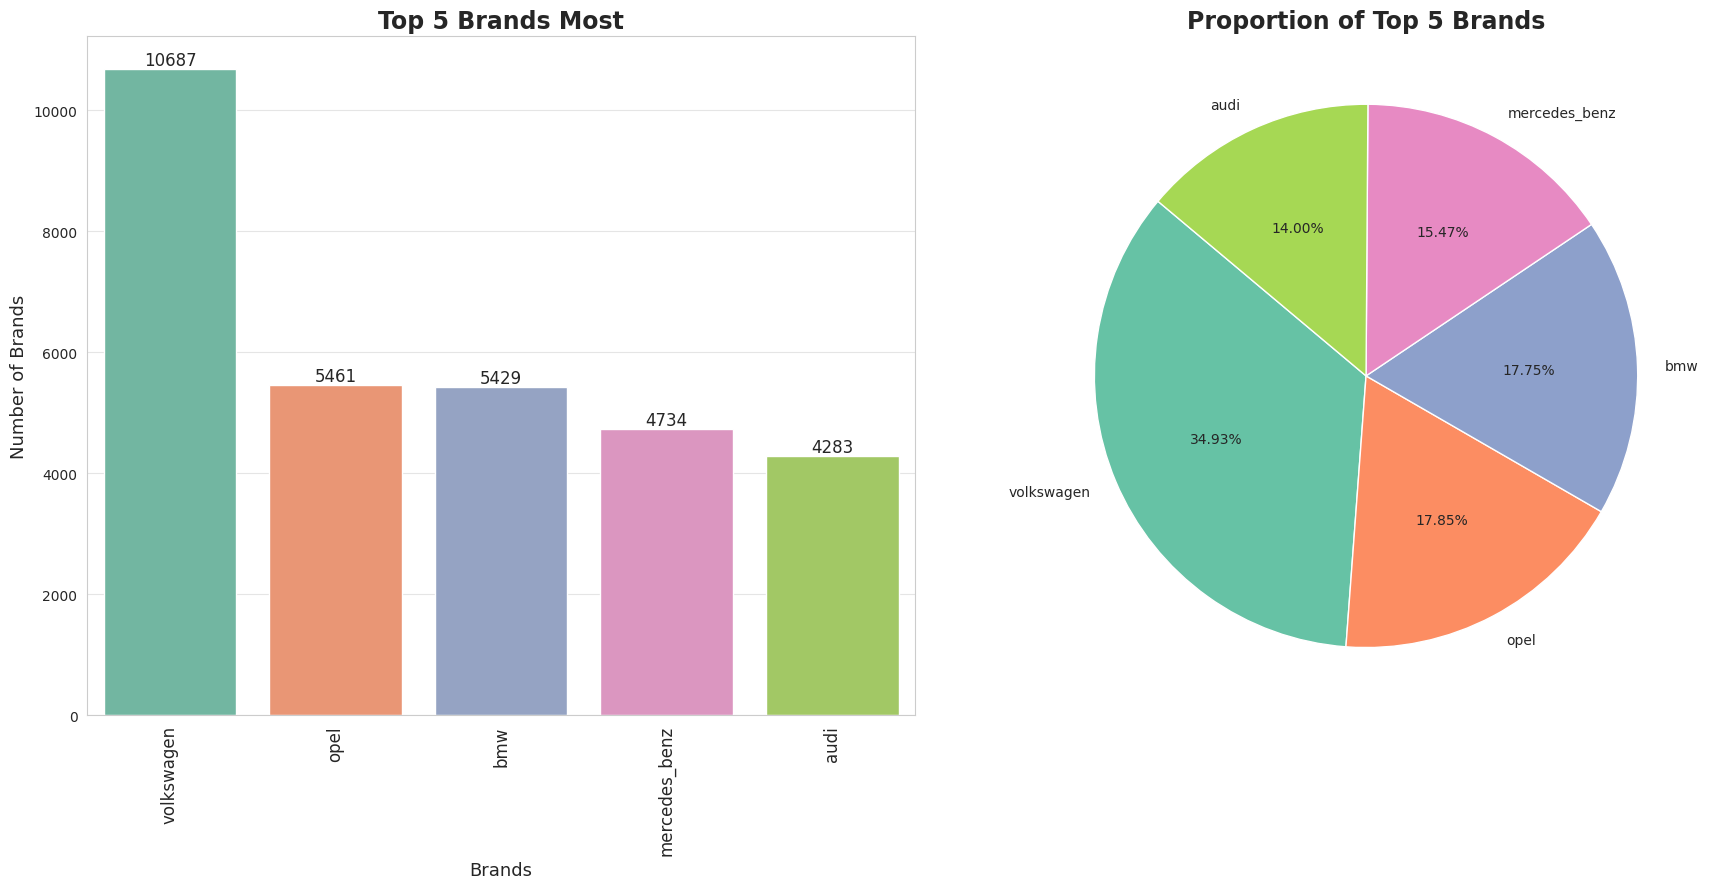

In [ ]:
top_sell = df['brand'].value_counts(ascending=False).head(5)
fig, ax = plt.subplots(1,2, figsize=(18, 9))

sns.barplot(ax=ax[0],
            x=top_sell.index,
            y=top_sell.values,
            palette='Set2')

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90, fontsize=12)
ax[0].set_xlabel('Brands', fontsize=13)
ax[0].set_ylabel('Number of Brands', fontsize=13)
ax[0].set_title('Top 5 Brands Most', fontsize=17, fontweight='bold')


for index, value in enumerate(top_sell.values):
    ax[0].text(index, value,
               f'{value}',
               ha='center',
               va='bottom',
               fontsize=12)

ax[0].grid(axis='y',
           linestyle='-',
           alpha=0.5)

ax[1].pie(top_sell.values,
            labels=top_sell.index,
            autopct='%.2f%%',
            startangle=140,
            colors=sns.color_palette('Set2', len(top_sell)))

ax[1].set_title('Proportion of Top 5 Brands',
                fontsize=17,
                fontweight='bold')

plt.tight_layout()
plt.show()

## Least 5 Brand

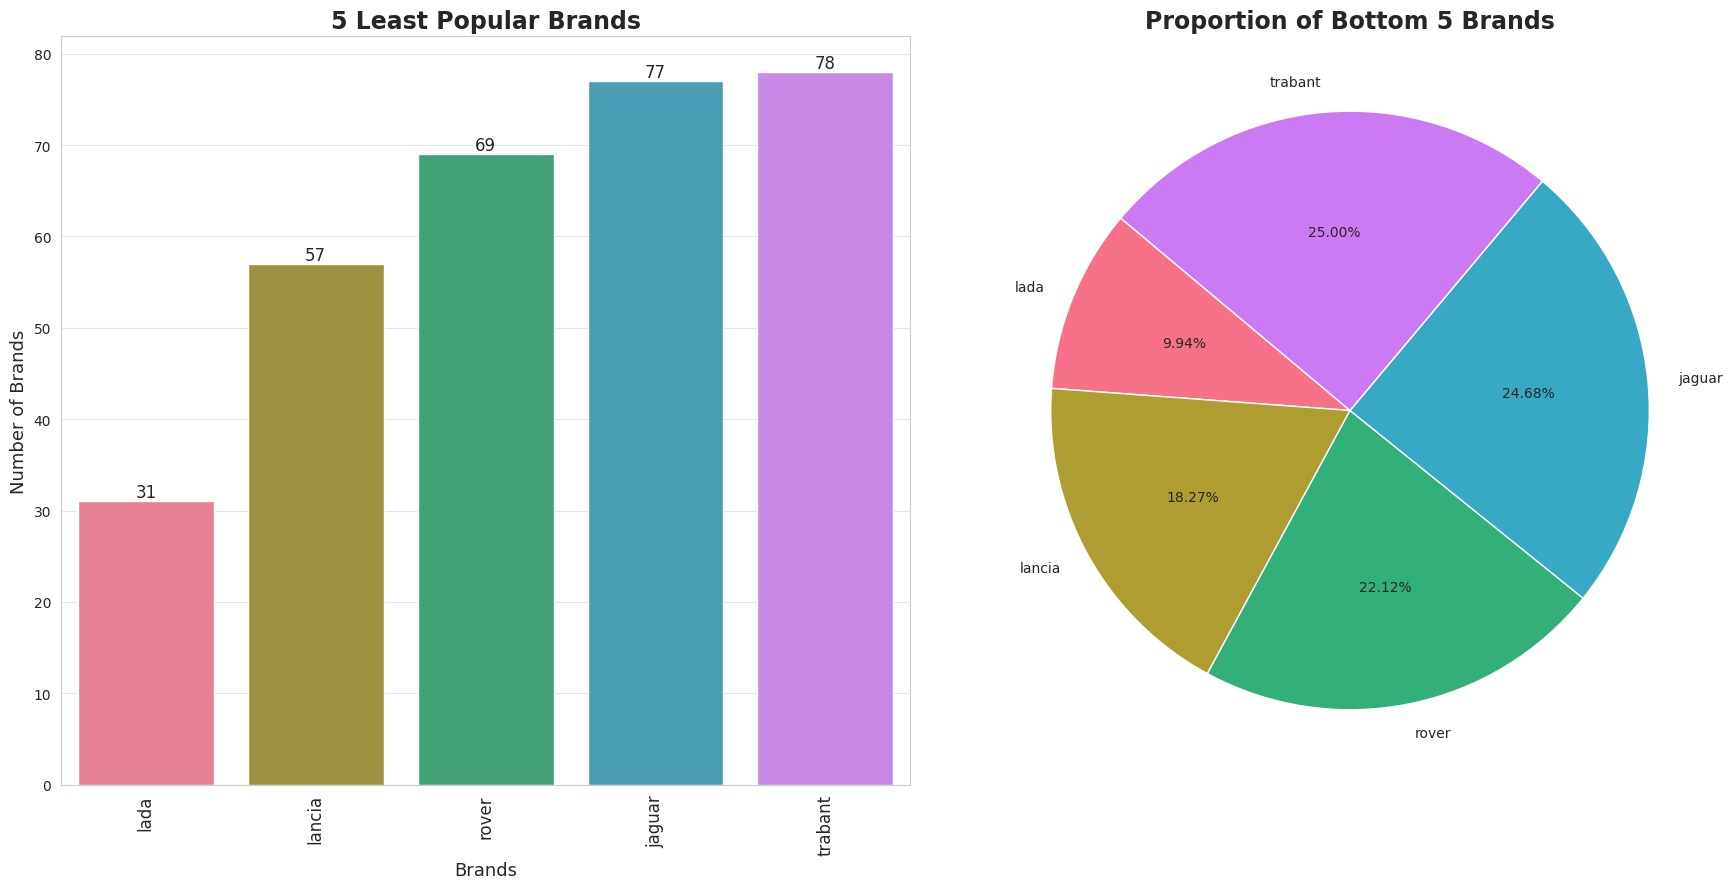

In [ ]:
bottom_sell = df['brand'].value_counts(ascending=True).head(5)
fig, axes = plt.subplots(1,2, figsize=(18, 9))

sns.barplot(ax=axes[0],
            x=bottom_sell.index,
            y=bottom_sell.values,
            palette='husl')

axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, fontsize=12)
axes[0].set_xlabel('Brands', fontsize=13)
axes[0].set_ylabel('Number of Brands', fontsize=13)
axes[0].set_title('5 Least Popular Brands', fontsize=17, fontweight='bold')

for index, value in enumerate(bottom_sell.values):
    axes[0].text(index, value,
                 f'{value}',
                 ha='center',
                 va='bottom',
                 fontsize=12)

axes[0].grid(axis='y',
             linestyle='-',
             alpha=0.5)

axes[1].pie(bottom_sell.values,
            labels=bottom_sell.index,
            autopct='%.2f%%',
            startangle=140,
            colors=sns.color_palette('husl', len(bottom_sell)))

axes[1].set_title('Proportion of Bottom 5 Brands',
                  fontsize=17,
                  fontweight='bold')

plt.tight_layout()
plt.show()

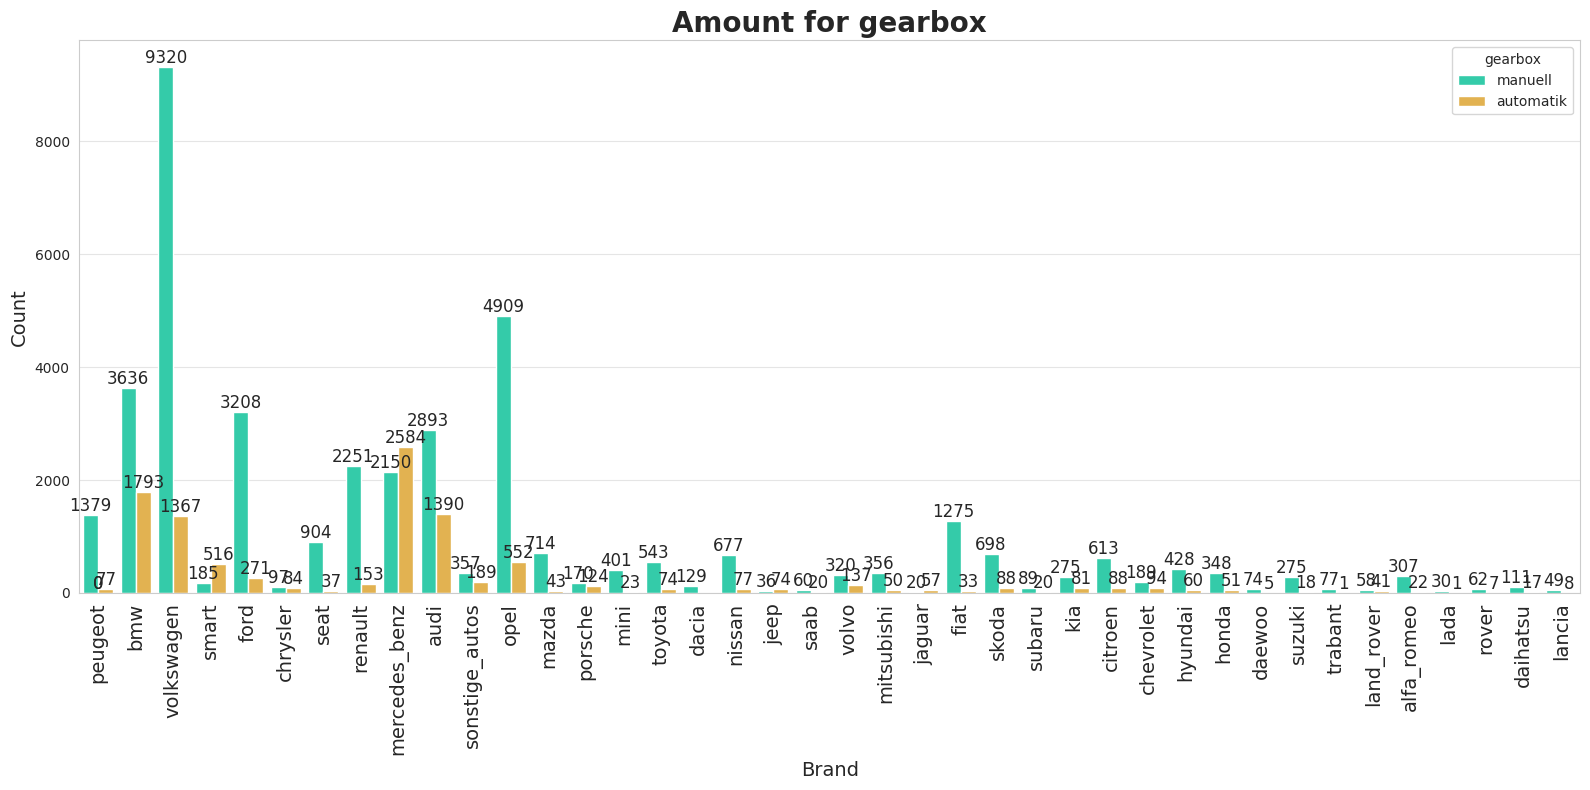

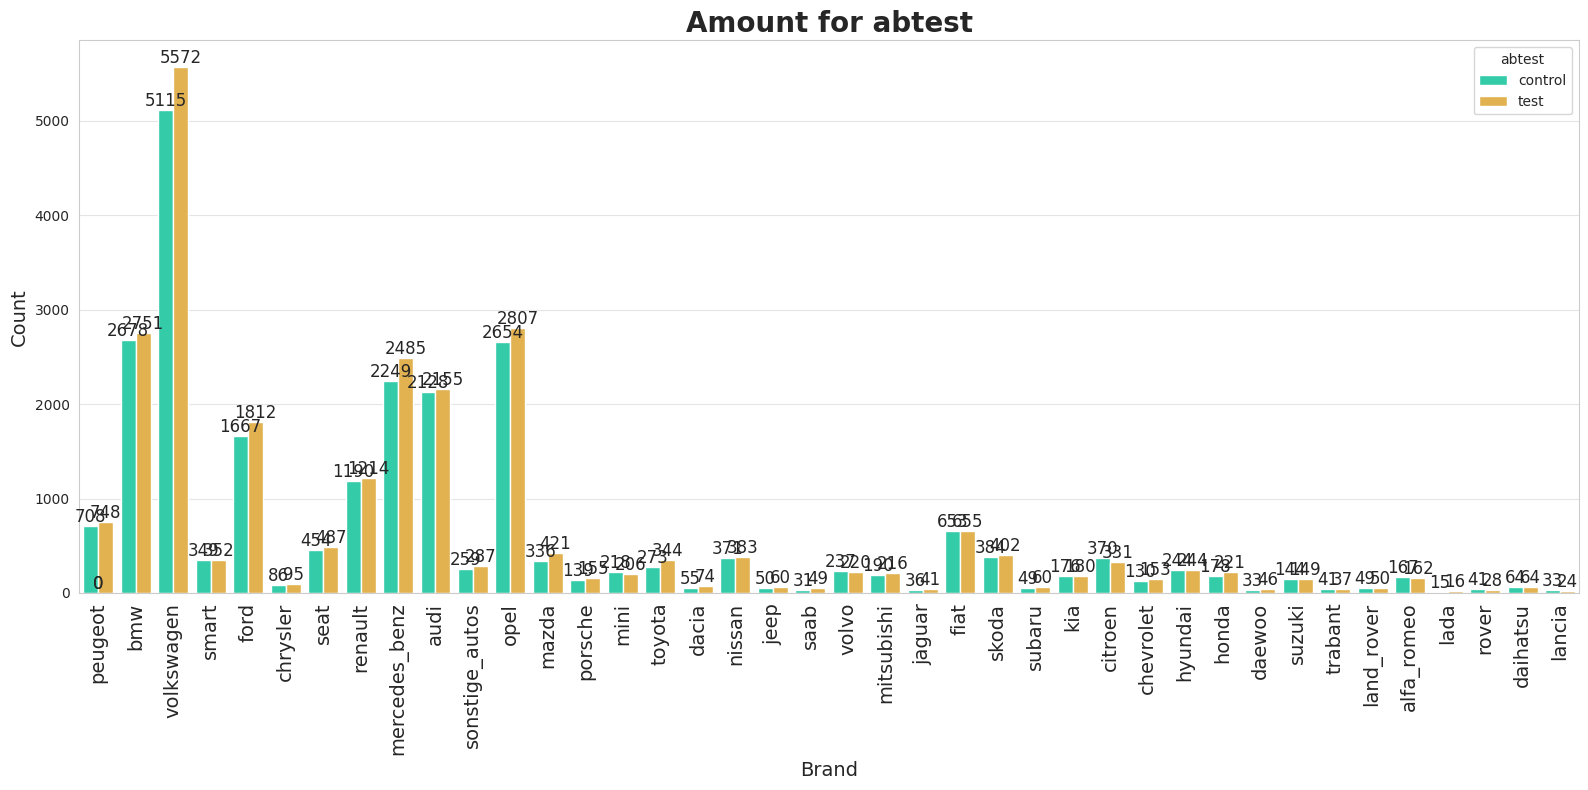

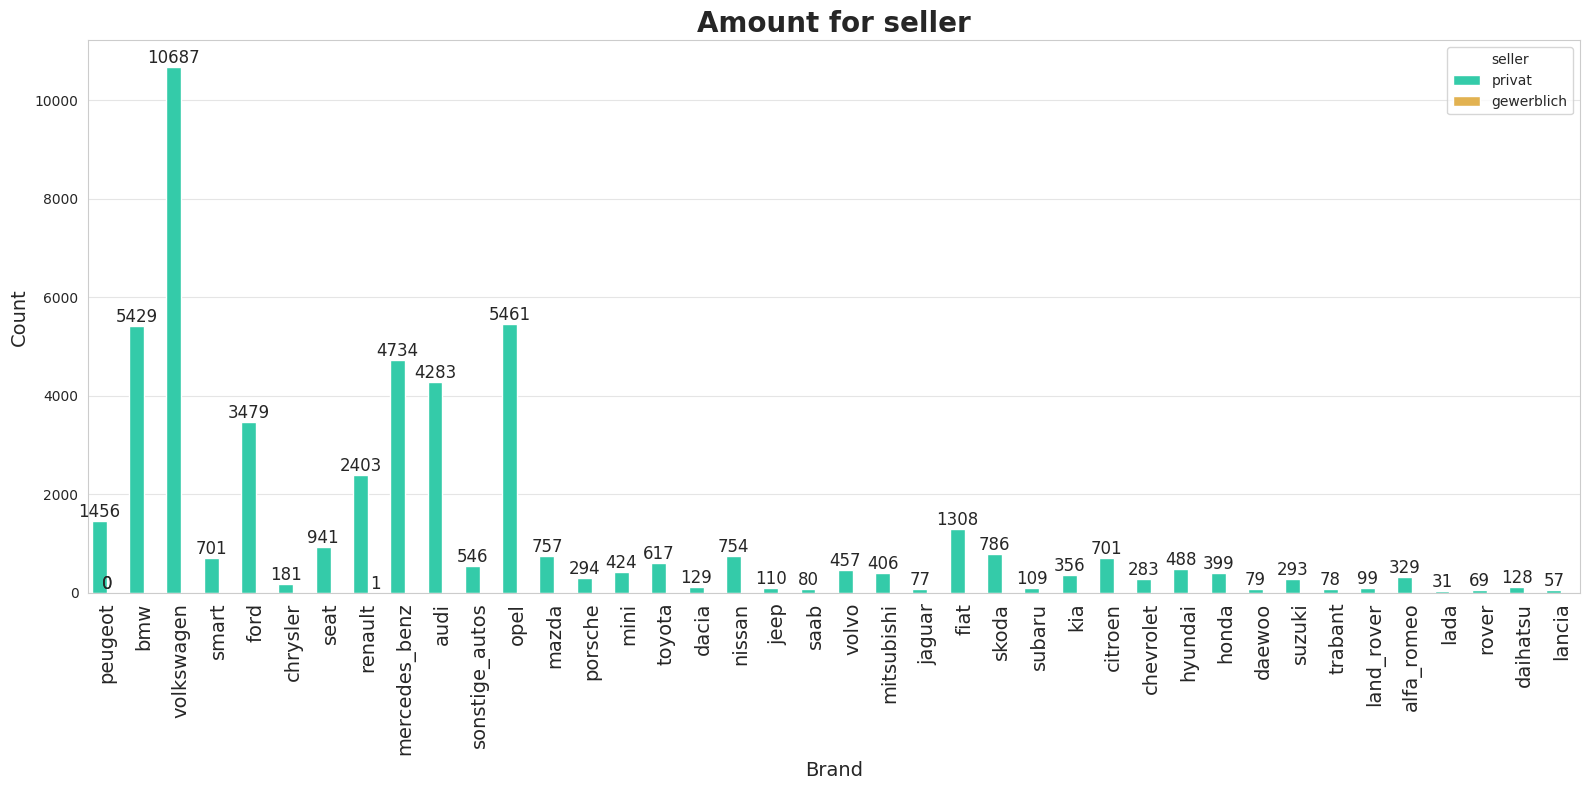

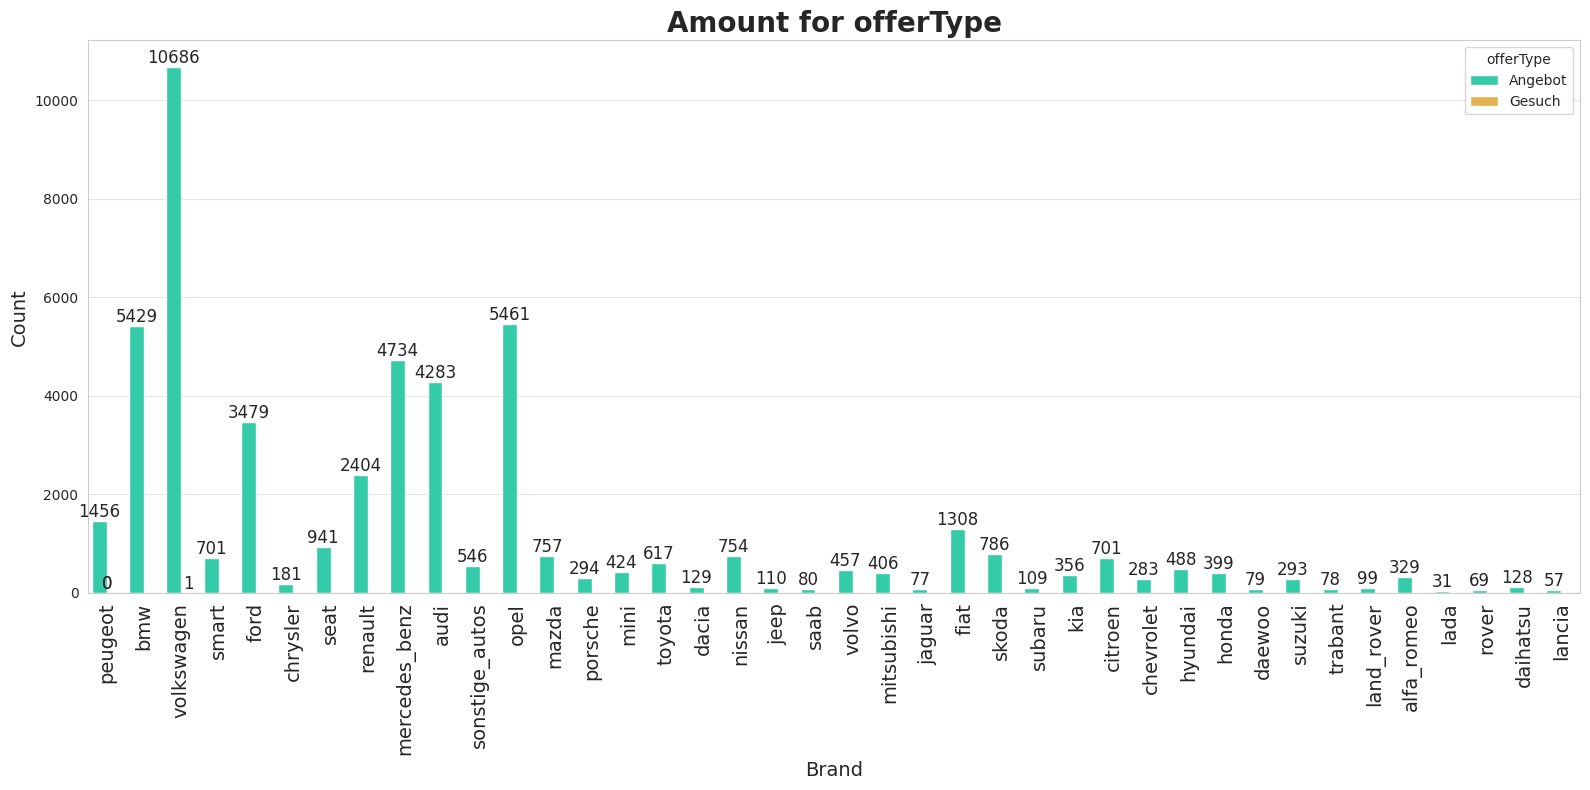

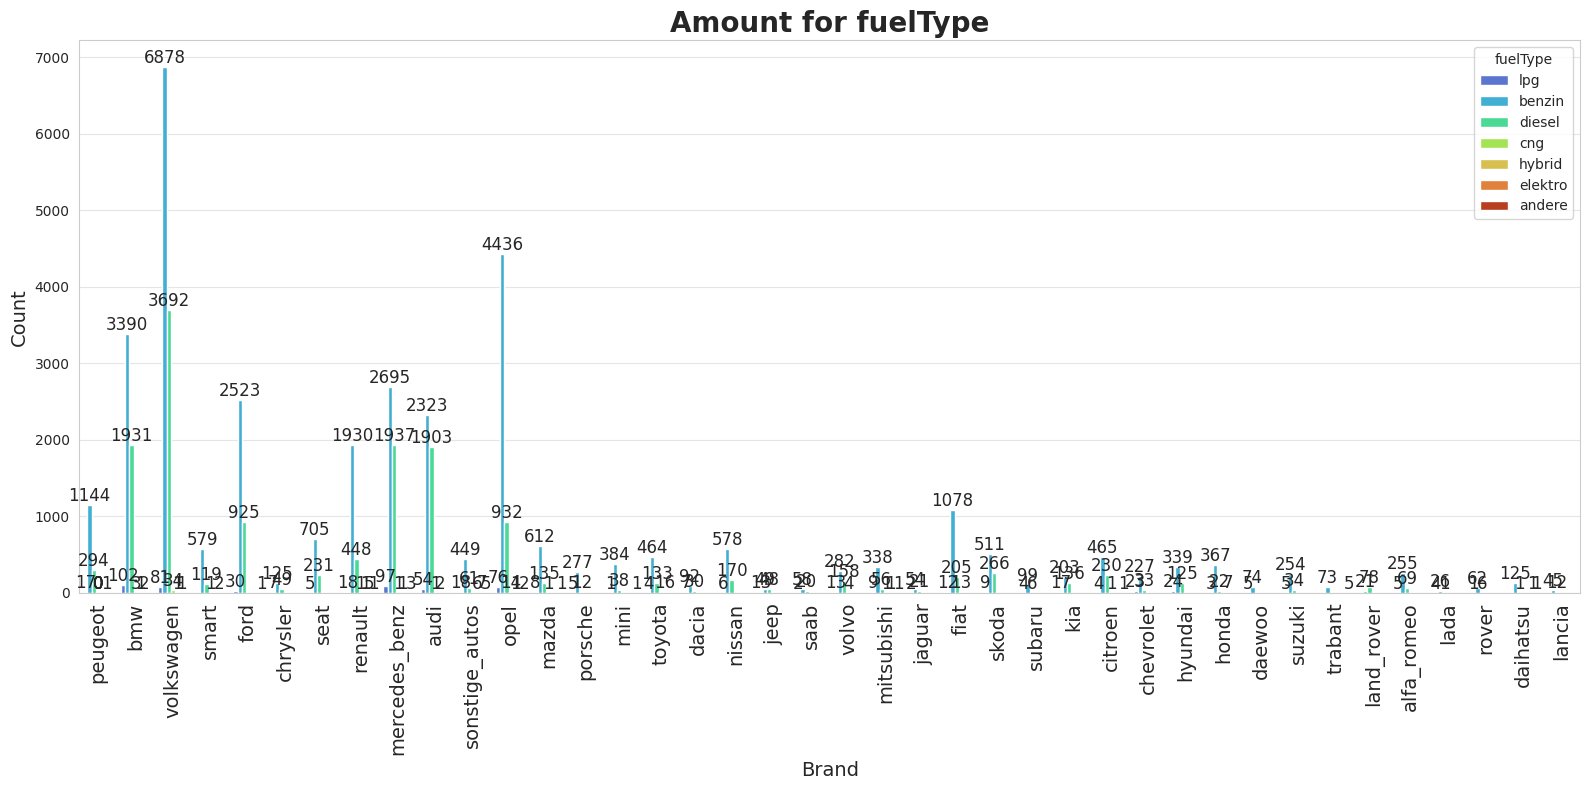

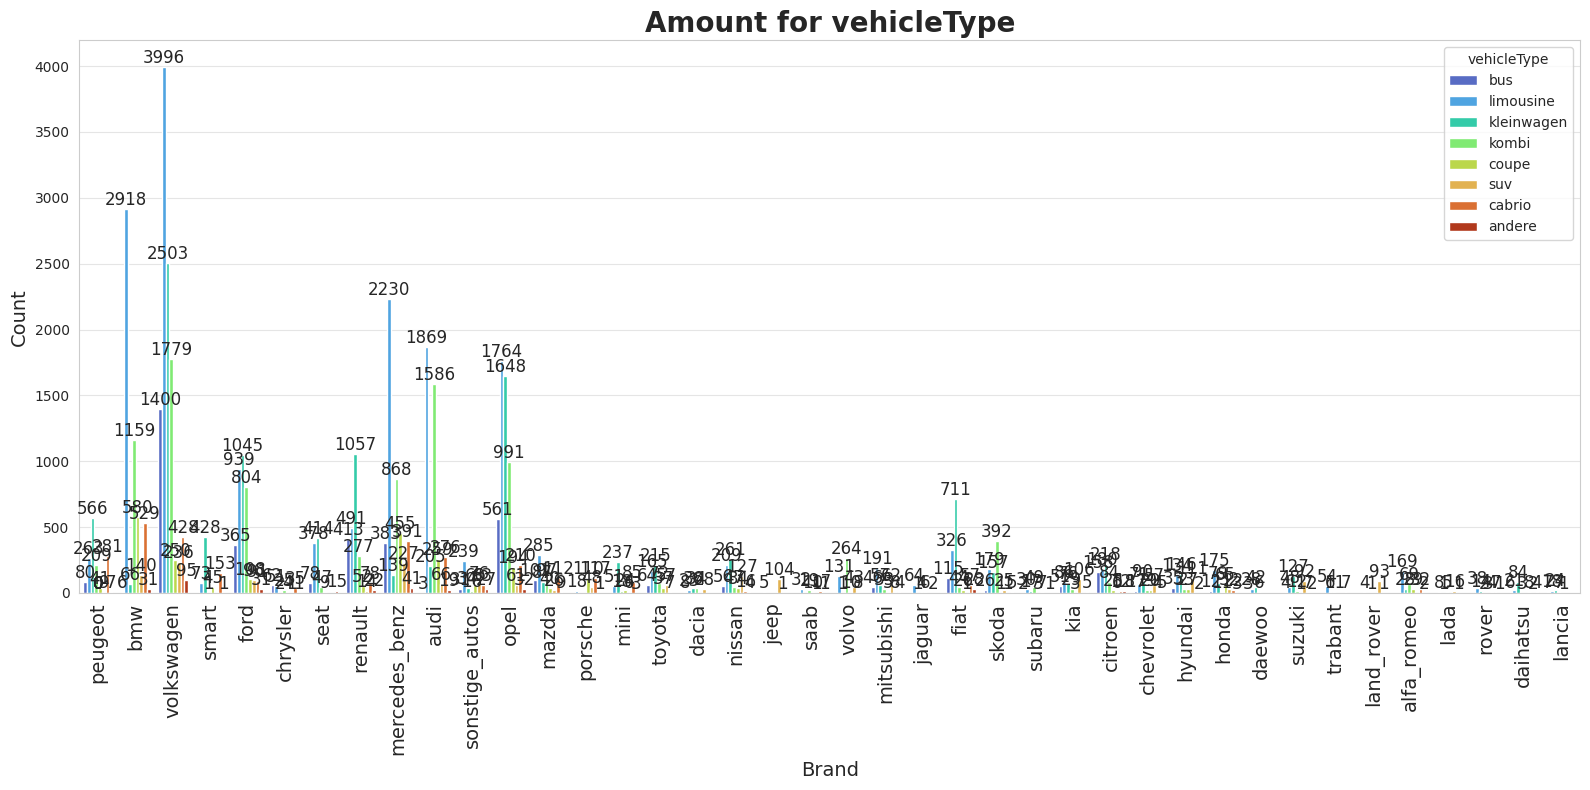

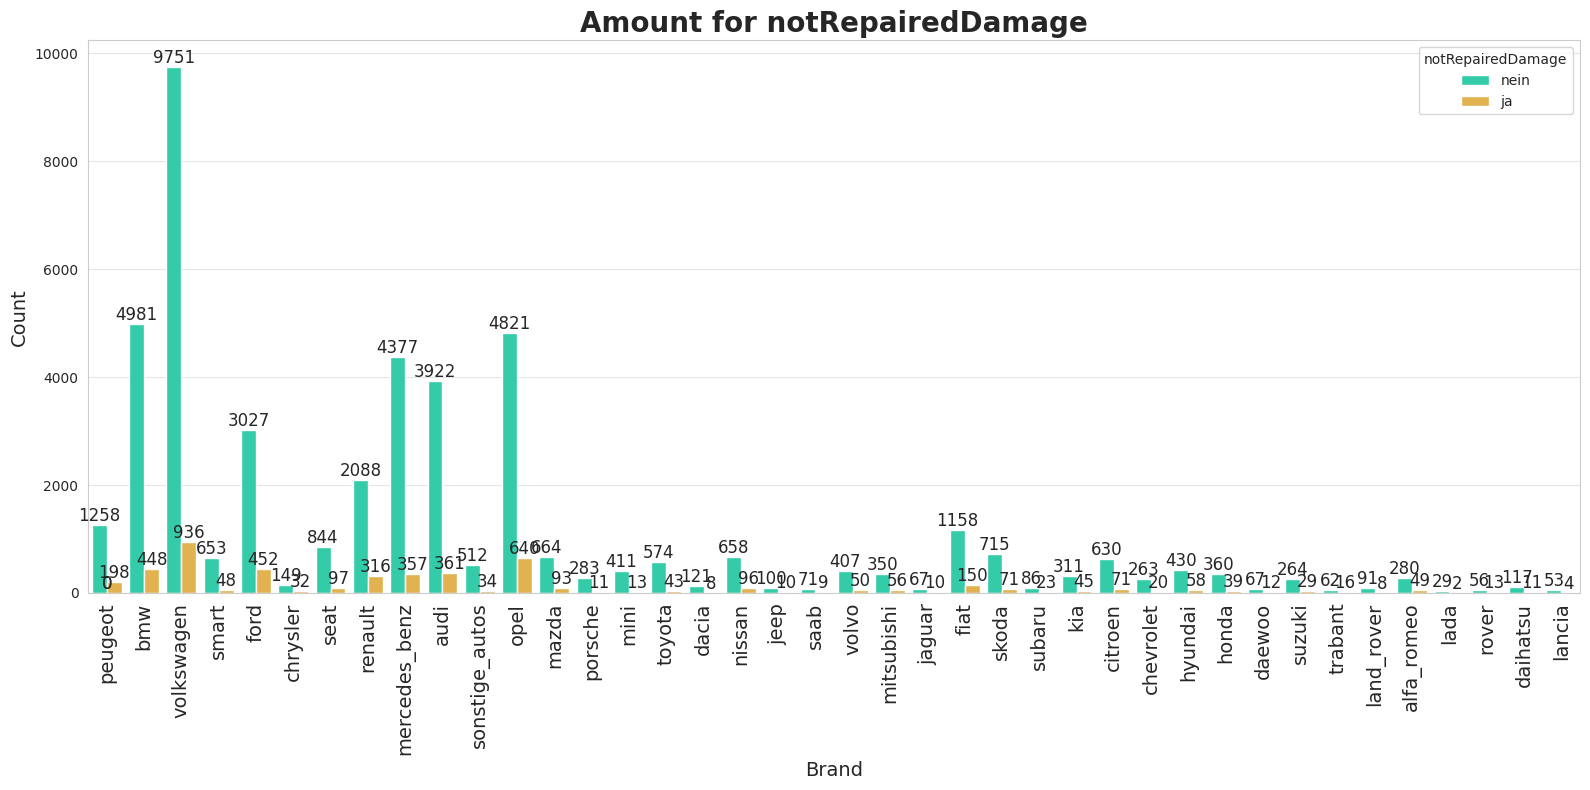

In [ ]:
def count_plot(hue):
  plt.figure(figsize=(16,8))
  ax = sns.countplot(x=df['brand'],
                     hue=df[hue],
                     palette='turbo')

  plt.xlabel('Brand', fontsize=14)
  plt.ylabel('Count', fontsize=14)
  plt.xticks(rotation=90, fontsize=12)
  plt.title(f'Amount for {hue}', fontsize=20, fontweight='bold')

  for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2.,
                 p.get_height()),
                ha='center',
                va='bottom',
                fontsize=12)
  plt.xticks(rotation=90, fontsize=14)
  plt.grid(axis='y',
           linestyle='-',
           alpha=0.5)
  plt.tight_layout()
  plt.show()

columns = ['gearbox','abtest','seller','offerType','fuelType','vehicleType','notRepairedDamage']
for c in columns:
  count_plot(c)

## Popular Vehicle Types

In [ ]:
df['vehicleType'].unique()

array(['bus', 'limousine', 'kleinwagen', 'kombi', 'coupe', 'suv',
       'cabrio', 'andere'], dtype=object)

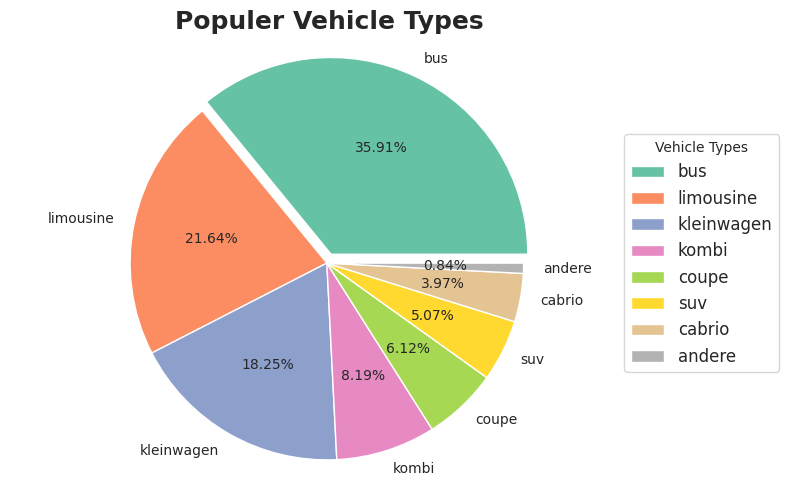

In [ ]:
fig = plt.figure(figsize=(8,5))
vehicle = df['vehicleType'].value_counts()
val = vehicle * 100/len(df)
labels = ['bus', 'limousine', 'kleinwagen', 'kombi', 'coupe', 'suv', 'cabrio', 'andere']
explode = [0.05, 0, 0, 0, 0, 0, 0, 0]
palette_color = sns.color_palette('Set2')

plt.pie(val,
        labels=labels,
        explode=explode,
        colors=palette_color,
        autopct='%.2f%%')
plt.title('Populer Vehicle Types',
          fontsize=18,
          fontweight='bold')
plt.legend(loc='best',
           title='Vehicle Types',
           bbox_to_anchor=(0.95, 0.8),
           fontsize=12)
plt.axis('equal')
plt.tight_layout()
plt.show()

## Average Prices Based on Vehicle Type and Fuel Type


In [ ]:
average_price_by_vehicle = df.groupby('vehicleType')['price'].mean().sort_values(ascending=False)
average_price_by_vehicle

,price
vehicleType,
coupe,17372.441466
limousine,15390.108667
suv,13265.415911
cabrio,10628.385168
bus,6810.913511
kombi,5922.221540
andere,4139.023810
kleinwagen,2686.020606


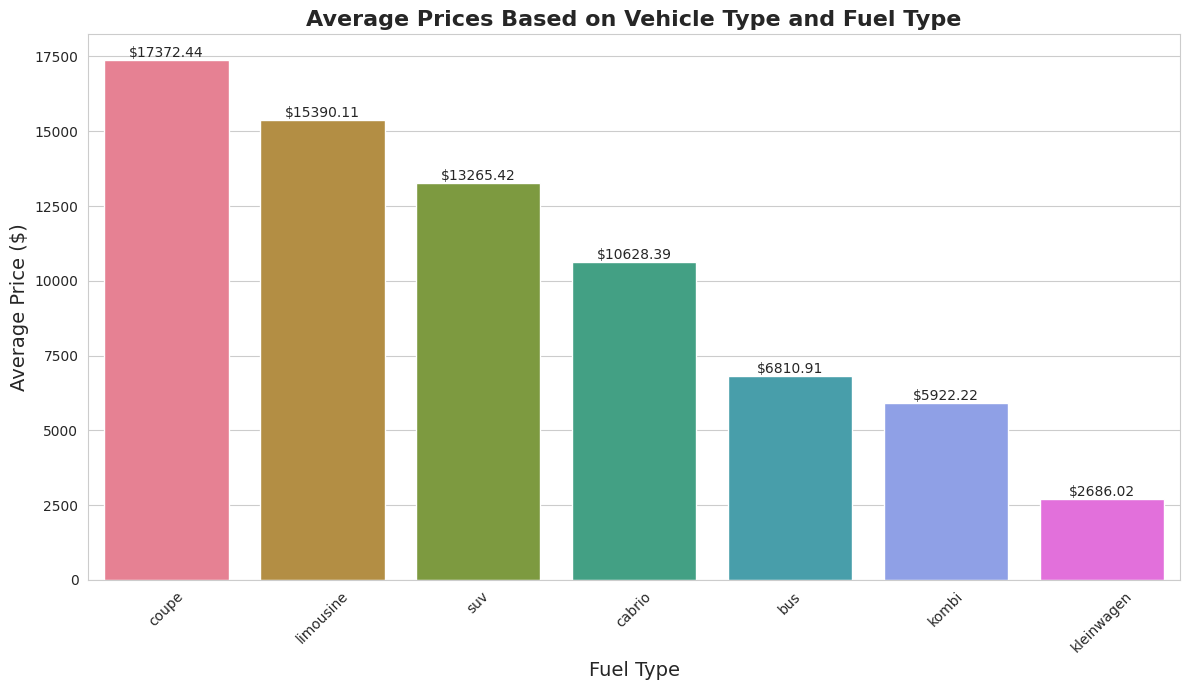

In [ ]:
plt.figure(figsize=(12, 7))
average_price_by_vehicle.drop(labels=['andere'], axis=0, inplace=True)
average_price_by_vehicle = pd.DataFrame({'Fuel Type': average_price_by_vehicle.index,
                                         'Average Price': average_price_by_vehicle})
sns.barplot(x='Fuel Type',
            y='Average Price',
            data=average_price_by_vehicle,
            palette='husl')

for index, value in enumerate(average_price_by_vehicle['Average Price']):
    plt.text(index, value + 0.5,
             f'${value:.2f}',
             ha='center',
             va='bottom',
             fontsize=10)

plt.xlabel('Fuel Type', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y',
         linestyle='-',
         alpha=1)
plt.title('Average Prices Based on Vehicle Type and Fuel Type',
          fontsize=16,
          fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
df1 = df.drop(['dateCrawled','dateCreated','lastSeen','nrOfPictures'], axis=1)
df1.T.style.background_gradient(axis=1)

## Check Variables That Are Numeric

In [ ]:
num = [i for i in df1.columns if df1[i].dtype != 'object']
print('The Numerical Variables Are:', num)

The Numerical Variables Are: ['price', 'yearOfRegistration', 'powerPS', 'odometer_km', 'monthOfRegistration', 'postalCode']


In [ ]:
fitur_to_drop = ['yearOfRegistration', 'monthOfRegistration', 'postelCode']
num_filter = [feature for feature in num if feature not in fitur_to_drop]
num_filter

['price', 'powerPS', 'odometer_km', 'postalCode']

## Check Variables That Are Categories

In [ ]:
cat_filter = [i for i in df1.columns if df1[i].dtype == 'object']
print('The Categorical Variables Are', cat_filter)

The Categorical Variables Are ['name', 'seller', 'offerType', 'abtest', 'vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage']


## Label Encoding

In [ ]:
label = LabelEncoder()
for i in cat_filter:
  df1[i] = label.fit_transform(df1[i])
  df1[i] = df1[i].tolist()

for feature, encoder in df1.items():
  encoder_file_name = f'{feature}_label_encoder.pk1'

  # save the encoder object
  with open(encoder_file_name, 'wb') as f:
    pickle.dump(encoder, f)

## Outlier Removal

In [ ]:
columns

['gearbox',
 'abtest',
 'seller',
 'offerType',
 'fuelType',
 'vehicleType',
 'notRepairedDamage']

In [ ]:
def remove_outliers(df1, num_filter):
  for col in num_filter:
    q1 = df1[col].quantile(0.20)
    q3 = df1[col].quantile(0.80)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df1 = df1[(df1[col] >= lower_bound) & (df1[col] <= upper_bound)]
  return df1

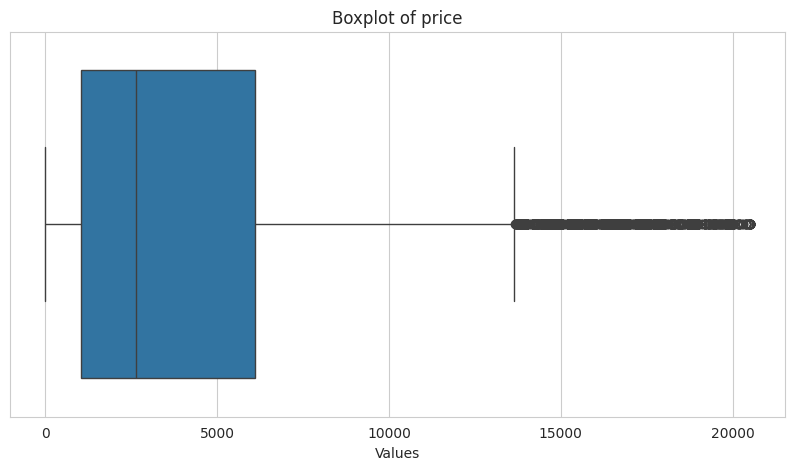

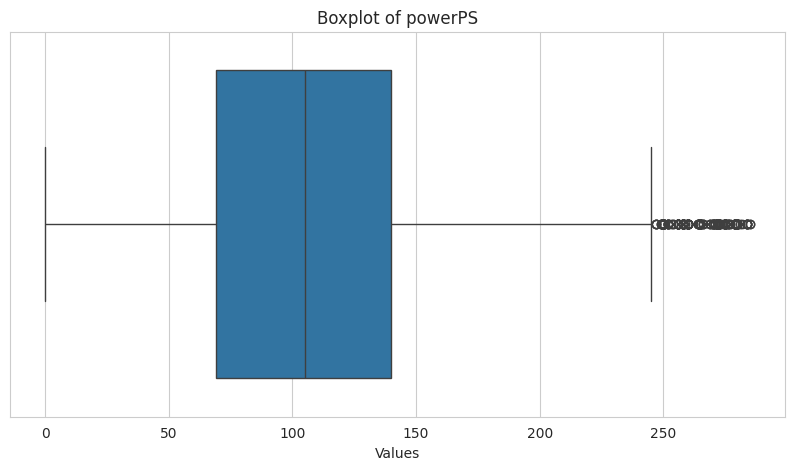

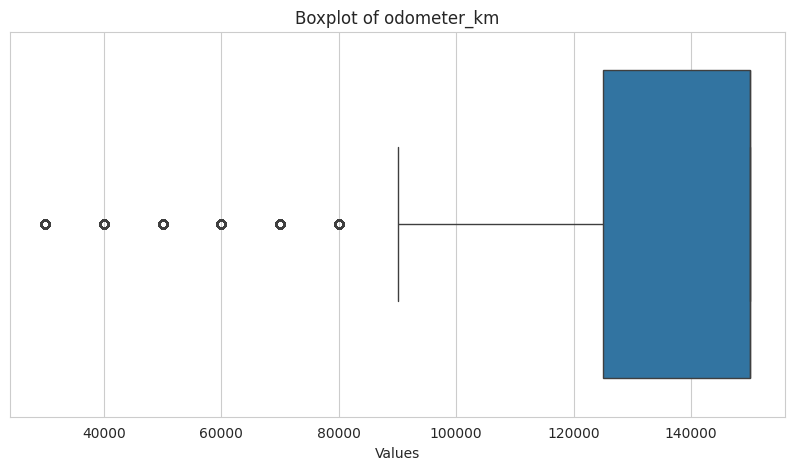

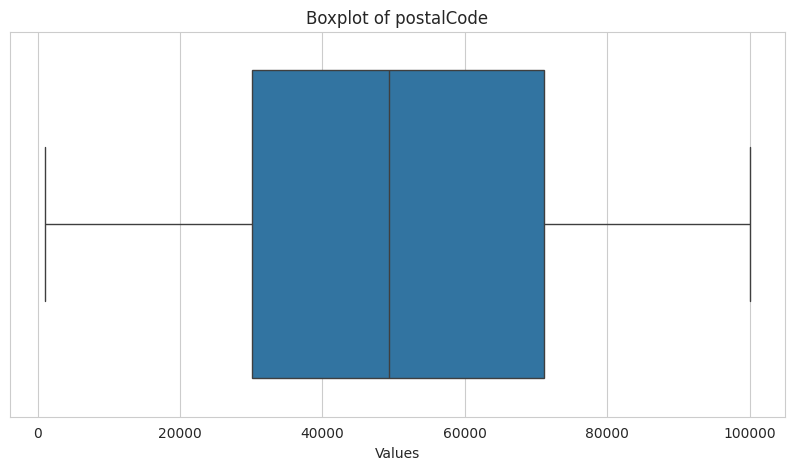

In [ ]:
clean_car_data = remove_outliers(df1, num_filter)
for feature in num_filter:
  plt.figure(figsize=(10,5))
  sns.boxplot(x=clean_car_data[feature])
  plt.title(f'Boxplot of {feature}')
  plt.xlabel('Values')
  plt.show()

In [ ]:
clean_car_data

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer_km,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,24775,1,0,5000,0,1,2004,1,158,40,150000,3,6,25,1,79588
2,34551,1,0,8990,1,6,2009,1,102,116,70000,7,1,38,1,35394
3,29252,1,0,4350,0,4,2007,0,71,106,70000,6,1,32,1,33729
4,11121,1,0,1350,1,5,2003,1,0,103,150000,7,1,10,1,39218
5,8115,1,0,7900,1,1,2006,0,150,234,150000,4,3,4,1,22962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,15213,1,0,500,0,6,2016,1,0,222,150000,0,1,27,1,61350
49992,9862,1,0,4800,0,4,2009,1,120,40,125000,9,6,9,1,68642
49993,2079,1,0,1650,0,4,1997,1,0,116,150000,7,1,1,1,65203
49996,21080,1,0,1980,0,2,1996,1,75,43,150000,5,1,24,1,44807


## Feature Selection

## Analysis of Variance (ANOVA) Test

### Data Splitting

In [ ]:
x = clean_car_data.drop('price', axis=1).values
y = clean_car_data['price'].values

In [ ]:
x = pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,24775,1,0,0,1,2004,1,158,40,150000,3,6,25,1,79588
1,34551,1,0,1,6,2009,1,102,116,70000,7,1,38,1,35394
2,29252,1,0,0,4,2007,0,71,106,70000,6,1,32,1,33729
3,11121,1,0,1,5,2003,1,0,103,150000,7,1,10,1,39218
4,8115,1,0,1,1,2006,0,150,234,150000,4,3,4,1,22962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45515,15213,1,0,0,6,2016,1,0,222,150000,0,1,27,1,61350
45516,9862,1,0,0,4,2009,1,120,40,125000,9,6,9,1,68642
45517,2079,1,0,0,4,1997,1,0,116,150000,7,1,1,1,65203
45518,21080,1,0,0,2,1996,1,75,43,150000,5,1,24,1,44807


In [ ]:
y = pd.DataFrame(y)
y

,0
0,5000
1,8990
2,4350
3,1350
4,7900
...,...
45515,500
45516,4800
45517,1650
45518,1980


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [ ]:
selector = SelectKBest(f_classif, k=9)
x_selected = selector.fit(x_train, y_train)

In [ ]:
selector.scores_

array([1.32017579, 0.25493589, 0.02278594, 1.00057932, 1.23620813,
       0.14878483, 2.66996804, 8.51283625, 1.14487241, 6.08941302,
       1.57849672, 3.60375852, 1.33666012, 2.51326989, 1.18242861])

In [ ]:
cols = selector.get_support(indices=True)
cols

array([ 0,  4,  6,  7,  9, 10, 11, 12, 13])

In [ ]:
clean_car = clean_car_data.iloc[:, cols]
clean_car

,name,abtest,yearOfRegistration,gearbox,model,odometer_km,monthOfRegistration,fuelType,brand
0,24775,0,2004,1,40,150000,3,6,25
2,34551,1,2009,1,116,70000,7,1,38
3,29252,0,2007,0,106,70000,6,1,32
4,11121,1,2003,1,103,150000,7,1,10
5,8115,1,2006,0,234,150000,4,3,4
...,...,...,...,...,...,...,...,...,...
49991,15213,0,2016,1,222,150000,0,1,27
49992,9862,0,2009,1,40,125000,9,6,9
49993,2079,0,1997,1,116,150000,7,1,1
49996,21080,0,1996,1,43,150000,5,1,24


In [ ]:
clean_car['price'] = clean_car_data['price']
clean_car.to_csv('selecte', index=False)
clean_car

,name,abtest,yearOfRegistration,gearbox,model,odometer_km,monthOfRegistration,fuelType,brand,price
0,24775,0,2004,1,40,150000,3,6,25,5000
2,34551,1,2009,1,116,70000,7,1,38,8990
3,29252,0,2007,0,106,70000,6,1,32,4350
4,11121,1,2003,1,103,150000,7,1,10,1350
5,8115,1,2006,0,234,150000,4,3,4,7900
...,...,...,...,...,...,...,...,...,...,...
49991,15213,0,2016,1,222,150000,0,1,27,500
49992,9862,0,2009,1,40,125000,9,6,9,4800
49993,2079,0,1997,1,116,150000,7,1,1,1650
49996,21080,0,1996,1,43,150000,5,1,24,1980


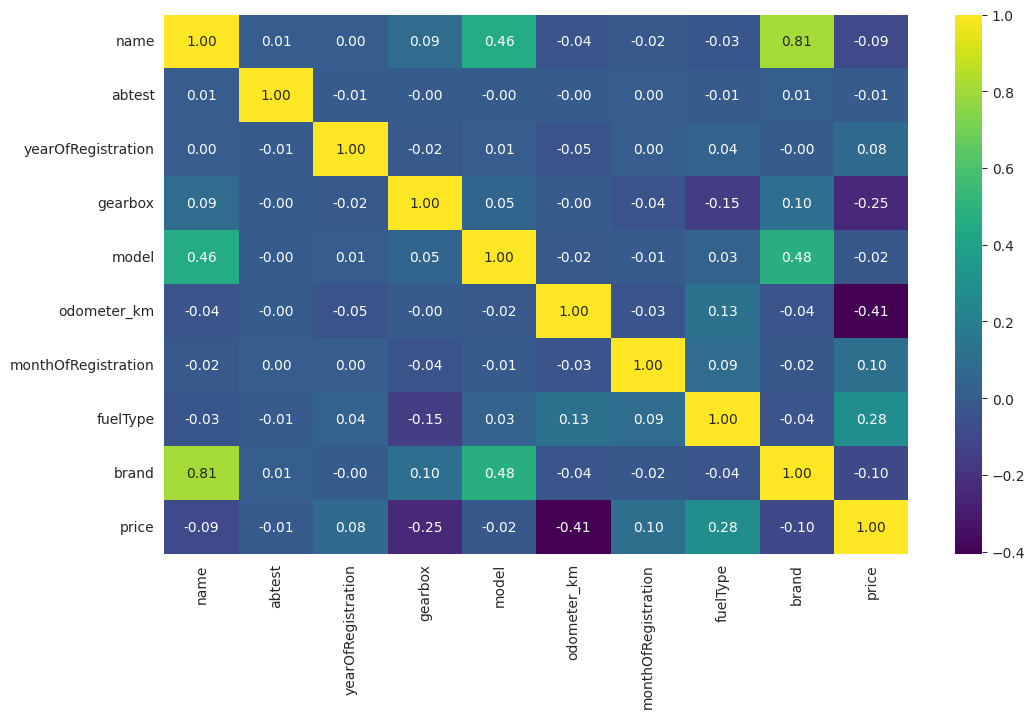

In [ ]:
correlation_matrix = clean_car.corr()

plt.figure(figsize=(12,7))
sns.heatmap(clean_car.corr(),
            annot = True,
            fmt=".2f",
            cmap='viridis')
plt.show()

In [ ]:
x = clean_car.drop('price', axis=1).values
y = clean_car['price'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)
print(f'Train Shape: {x_train.shape}')
print('\n')
print(f'Test Shape: {x_test.shape}')

Train Shape: (31864, 9)


Test Shape: (13656, 9)


## Linear Regression Model

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred_lr = lr.predict(x_test)
y_pred_lr

array([1903.97824661, 5392.25225416, 3426.89699914, ..., 8645.59927762,
       3759.14188153, 3521.97411428])

## Decision Tree Regression Model

In [ ]:
dt = DecisionTreeRegressor(criterion='squared_error')
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_dt = dt.predict(x_test)
y_pred_dt

array([  870., 13499.,  2280., ...,  5500.,   300.,  1480.])

## Rendom Forest Regressor Model

In [ ]:
rf = RandomForestRegressor(n_estimators=100,
                           random_state=10)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=10)

In [ ]:
y_pred_rf = rf.predict(x_test)
y_pred_rf

array([  534.4 , 11629.07,  2008.33, ...,  7658.97,  1829.13,  1347.27])

## AdaBoost Regressor Model

In [ ]:
base_estimator = DecisionTreeRegressor(max_depth=10)
abr = AdaBoostRegressor(n_estimators=100,
                        learning_rate=0.1,
                        random_state=10)
abr.fit(x_train, y_train)

AdaBoostRegressor(learning_rate=0.1, n_estimators=100, random_state=10)

In [ ]:
y_pred_abr = abr.predict(x_test)
y_pred_abr

array([ 3301.07920048, 10361.91733948,  3508.14786599, ...,
        9964.98168941,  4965.95949477,  3567.96877285])

## GradientBoost Regreesor Model

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=100,
                                learning_rate=0.1,
                                random_state=10)
gbr.fit(x_train, y_train)

GradientBoostingRegressor(random_state=10)

In [ ]:
y_pred_gbr = gbr.predict(x_test)
y_pred_gbr

array([  671.25957379, 10979.48390612,  1649.71778551, ...,
        9555.14674313,  1206.18969351,  1144.91505554])

## XGBoost Regressor Model

In [ ]:
xgbr = xgb.XGBRegressor(n_estimators=15,
                        learning_rate=0.1,
                        random_state=10)
xgbr.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=15, n_jobs=None,
             num_parallel_tree=None, random_state=10, ...)

In [ ]:
y_pred_xgbr = xgbr.predict(x_test)
y_pred_xgbr

array([1791.7863, 9521.741 , 2515.7458, ..., 8859.255 , 2557.3262,
       1927.2783], dtype=float32)

## Evaluation Metrics and Performance Model

In [ ]:
model = ('Linear Regression',
         'Decision Tree Regressor',
         'Random Forest Regressor',
         'AdaBoost Regressor',
         'GradientBoosting Regressor',
         'XGBoost Regressor')
models = [LinearRegression, DecisionTreeRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor,  xgb.XGBRegressor]
r2_list = []

In [ ]:
for i in models:
  print('\n')
  print('Model Name is', i)
  print('*'*100)
  mod = i().fit(x_train, y_train)
  y_pred = mod.predict(x_test)
  r2 = r2_score(y_test, y_pred)
  r2_list.append(r2)
  print('R2 Score:', r2_score(y_test, y_pred))
  print('Mean Absolute Error Score:', mean_absolute_error(y_test, y_pred))
  print('Mean Squared Error Score:', mean_squared_error(y_test, y_pred))
  print('MAPE Score:', mean_absolute_percentage_error(y_test, y_pred))
  print('='*100)



Model Name is <class 'sklearn.linear_model._base.LinearRegression'>
****************************************************************************************************
R2 Score: 0.32167788054461766
Mean Absolute Error Score: 2614.91214401647
Mean Squared Error Score: 12916622.630465465
MAPE Score: 3.811739170275244e+17


Model Name is <class 'sklearn.tree._classes.DecisionTreeRegressor'>
****************************************************************************************************
R2 Score: 0.5511443805012533
Mean Absolute Error Score: 1788.583882542472
Mean Squared Error Score: 8547117.197481366
MAPE Score: 2.687409959980137e+17


Model Name is <class 'sklearn.ensemble._forest.RandomForestRegressor'>
****************************************************************************************************
R2 Score: 0.7629760441895668
Mean Absolute Error Score: 1343.005998728207
Mean Squared Error Score: 4513414.650316245
MAPE Score: 2.7259831753623882e+17


Model Name is <class 'sk

In [ ]:
r2_list

[0.32167788054461766,
 0.5511443805012533,
 0.7629760441895668,
 0.4317808742502536,
 0.7126594148445909,
 0.7812857031822205]

In [ ]:
best_model = pd.DataFrame({'model':model, 'R2 Score': r2_list})
fine_model = best_model.sort_values(by='R2 Score', ascending=False)
fine_model

,model,R2 Score
5,XGBoost Regressor,0.781286
2,Random Forest Regressor,0.762976
4,GradientBoosting Regressor,0.712659
1,Decision Tree Regressor,0.551144
3,AdaBoost Regressor,0.431781
0,Linear Regression,0.321678


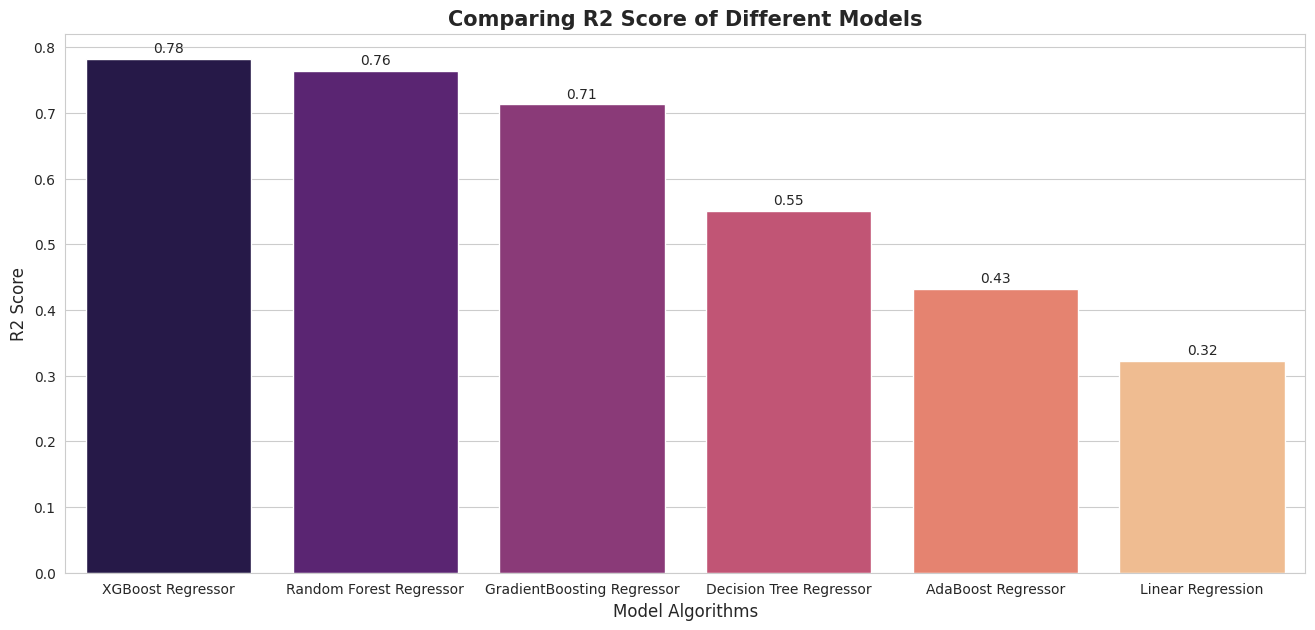

In [ ]:
plt.figure(figsize=(16,7))
plt.xticks(rotation=0, fontsize=10)
sns.barplot(x=fine_model['model'],
            y=fine_model['R2 Score'],
            data=fine_model,
            palette='magma',
            ci=None)

for index, value in enumerate(fine_model['R2 Score']):
    plt.text(index, value + 0.01, f"{value:.2f}", ha='center', fontsize=10)

plt.xlabel('Model Algorithms', fontsize=12)
plt.ylabel('R2 Score', fontsize=12)
plt.title('Comparing R2 Score of Different Models',
          fontsize=15,
          fontweight='bold')
plt.show()

## Model Tuning

In [ ]:
xgbr_model = xgb.XGBRegressor()

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300, 400],  # Increased range of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Added a higher learning rate for exploration
    'max_depth': [3, 5, 7, 9]  # Added a higher depth for potential complexity
}  # Maximum depth of a tree

grid_search = GridSearchCV(estimator=xgbr_model, param_grid=param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           verbose=1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

Fitting 5 folds for each of 64 candidates, totalling 320 fits


In [ ]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(x_test)
print('R2 Score:', r2_score(y_test, y_pred_best))

R2 Score: 0.7866203188896179


In [ ]:
df2 = pd.DataFrame({'Actual Value': y_test,
                    'Predicted Value': y_pred,
                    'Difference': y_test - y_pred})
df2

,Actual Value,Predicted Value,Difference
0,550,750.743225,-200.743225
1,7900,9419.466797,-1519.466797
2,1500,1719.245605,-219.245605
3,4700,3649.070557,1050.929443
4,1950,2498.817139,-548.817139
...,...,...,...
13651,6000,5742.695801,257.304199
13652,1999,7704.164062,-5705.164062
13653,10499,10695.484375,-196.484375
13654,0,1456.707642,-1456.707642
